# Background

I will examine a dataset from a tourism company to see what contributes to customers purchasing travel packages. The tourism company in this project wants to offer a new travel package for it's clients and potential clients. As I explore the data I am looking for correlations between the target variable and other features. Finding the correlation between the variables will help me gain a better understanding of how to advertise to customers to increase the chances of them purchasing a travel package, which is the goal for this company. I will also build a model that predicts the customers who will most llikely purchase the new travel package. 

# Objectives 
- To build a model that predicts which customers are likely to buy the new travel package
- Which features are the most important ones in the model prediction

# Data Dictionary 
1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0:No, 1:Yes)
3. Age: Age of customer 
4. TypeofContact: How customer was contacted(Company invited, or self inquiry)
5. CityTier: Depends on the development of a city, population, facilities, and living standards. 
6. DurationOfPitch: Duration of the pitch by a salesperson to the customer
7. Occupation: Occupation of the customer 
8. Gender: Gender of the customer 
9. NumberofPersonVisiting: Total number of people planning to take the trip with the customer 
10. NumberOfFollowups: Total number of follow-ups done by salesperson after pitch. 
11. ProductPitched: Product pitched by the salesperson
12. PreferredPropertyStar: Preferred hotel property rating by customer
13. MaritalStatus: Marital status of the customer  
14. NumberOfTrips: Average number of trips in a year taken by customer
15. Passport: Whether the customer has a passport or not (0:No, 1:Yes)
16. PitchSatisfactionScore: Sales pitch satisfaction score 
17. OwnCar: Whether the customers own a car or not (0:No, 1:Yes)
18. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
19. Designation: Designation of the customer in the current organization
20. MonthlyIncome: Gross monthly income of the customer

In [ ]:
pip install skimpy

In [2]:
#Library to clean column names 
from skimpy import clean_columns
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import io

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Uploading the dataset

In [3]:
from google.colab import files 
uploaded = files.upload()

Saving Tourism_dataset(2).xlsx to Tourism_dataset(2) (1).xlsx


In [4]:
tourism_data = pd.read_excel(io.BytesIO(uploaded['Tourism_dataset(2).xlsx']))


In [5]:
data = tourism_data.copy()

# Viewing the first and last 5 rows

In [6]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


# Data shape

In [8]:
data.shape

(4888, 20)

### Observation: 
The dataset has 4,888 rows and 20 columns

# Checking data types


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Observations:
14 of the features are numerical, and 6 of them are objects

In [10]:
#Storing all object featuress under cols. 
cols = data.select_dtypes(['object'])
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [11]:
#Converting object features to categorical. 
for i in cols.columns:
    data[i] = data[i].astype('category')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [15]:
#Checking for duplicate values
data.duplicated().sum()

0

### Observation

Their are no duplicated values

In [16]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CustomerID                  0.00
ProdTaken                   0.00
Age                         4.62
TypeofContact               0.51
CityTier                    0.00
DurationOfPitch             5.14
Occupation                  0.00
Gender                      0.00
NumberOfPersonVisiting      0.00
NumberOfFollowups           0.92
ProductPitched              0.00
PreferredPropertyStar       0.53
MaritalStatus               0.00
NumberOfTrips               2.86
Passport                    0.00
PitchSatisfactionScore      0.00
OwnCar                      0.00
NumberOfChildrenVisiting    1.35
Designation                 0.00
MonthlyIncome               4.77
dtype: float64

### Observation
- Age, Duration of pitch, Number of follow-ups, Preferred Property Star, Number of trips, Number of children, and monthly income all have a small protion of missing values. 
- Since none of them are greater than 35% I will not drop any features based on missing values. 



In [17]:
#drop the unique identifier. 
data = data.drop(columns=['CustomerID'])

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


### Observations:
- There are outliers in the age, number of trips columns, and monthly income
- The average monthly income is 23,619. 
- 75% of the dataset traveled with 3 or less people and 2 or less children under 5. 
- 75% of the dataset did not purchase a package. 

In [19]:
data.describe(exclude=np.number).T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


### Observations:
- Most individuals are self enquiries. 
- Their are 4 unique categories for marital status. 
- Most individuals are married. 
- Sales people are mainly pitching the basic package. 

### Viewing the unique values in the categorical features. 

In [20]:
cols_cat = data.select_dtypes(['category'])

In [21]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in Designation are :
Executiv

# EDA

## Univariate Analysis 

### 1. Numerical Features

In this univariate analysis I will observe each numerical variable independently. I am looking for insight and patterns produced by the data. 

In [22]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

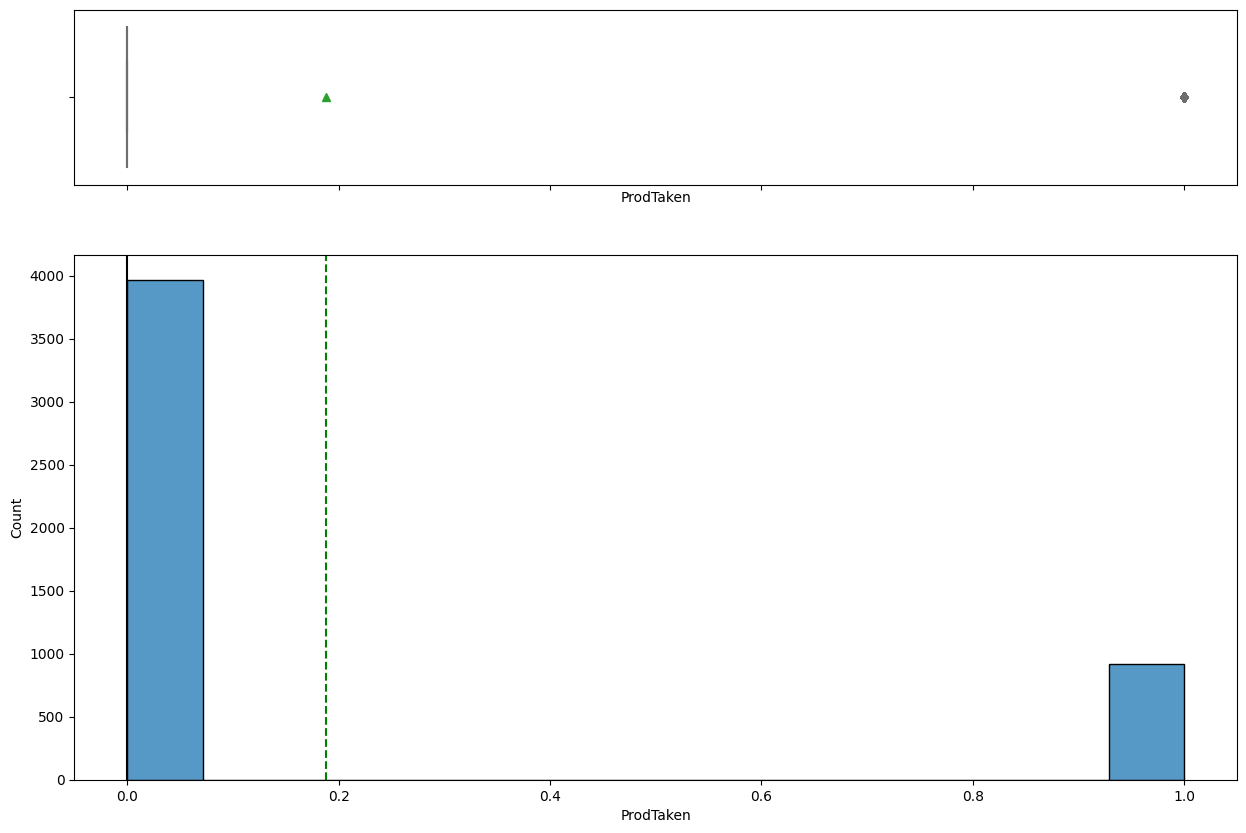

In [23]:
histogram_boxplot(data['ProdTaken'])

### Observations: 
- Few customers purchased a package after hearing the sales pitch. 

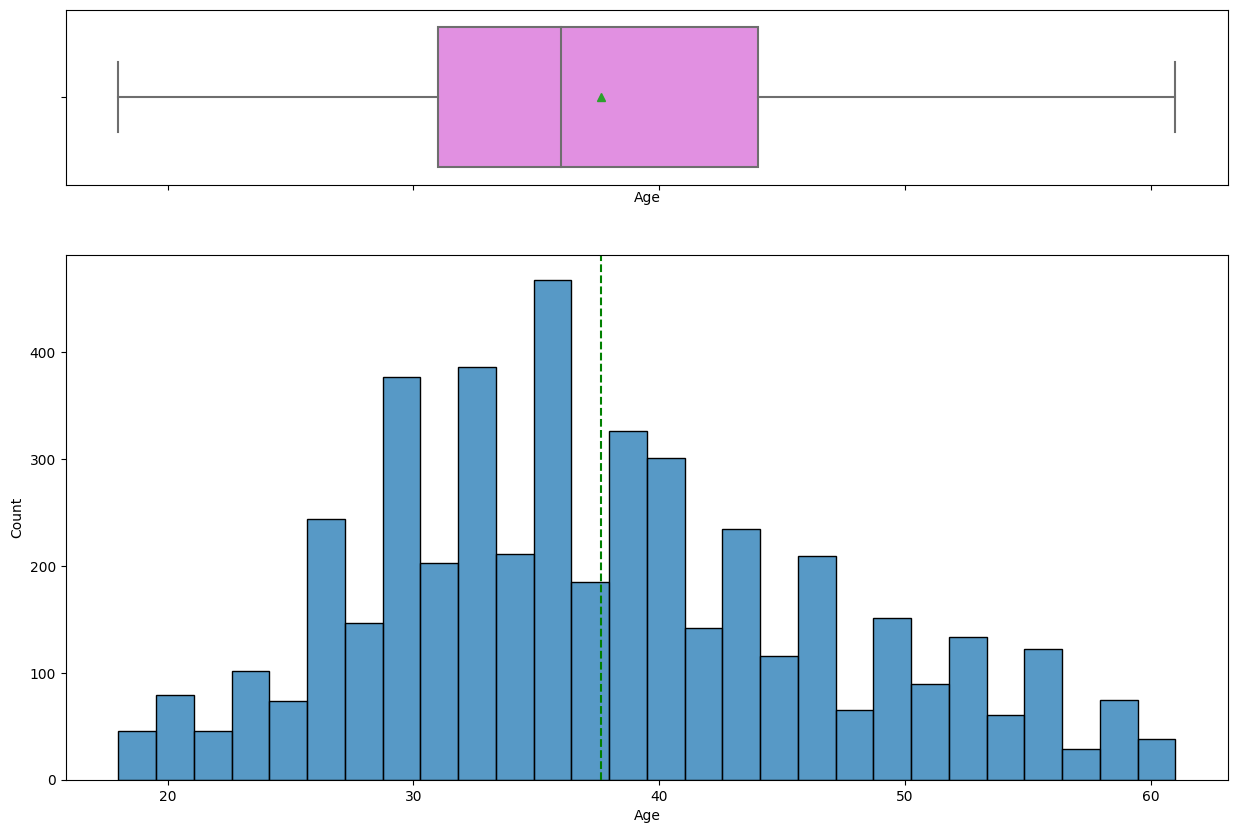

In [24]:
histogram_boxplot(data['Age'])

### Observations: 
- Age is normally distributed. 
- 50% of individuals fall between 30 and 50. 

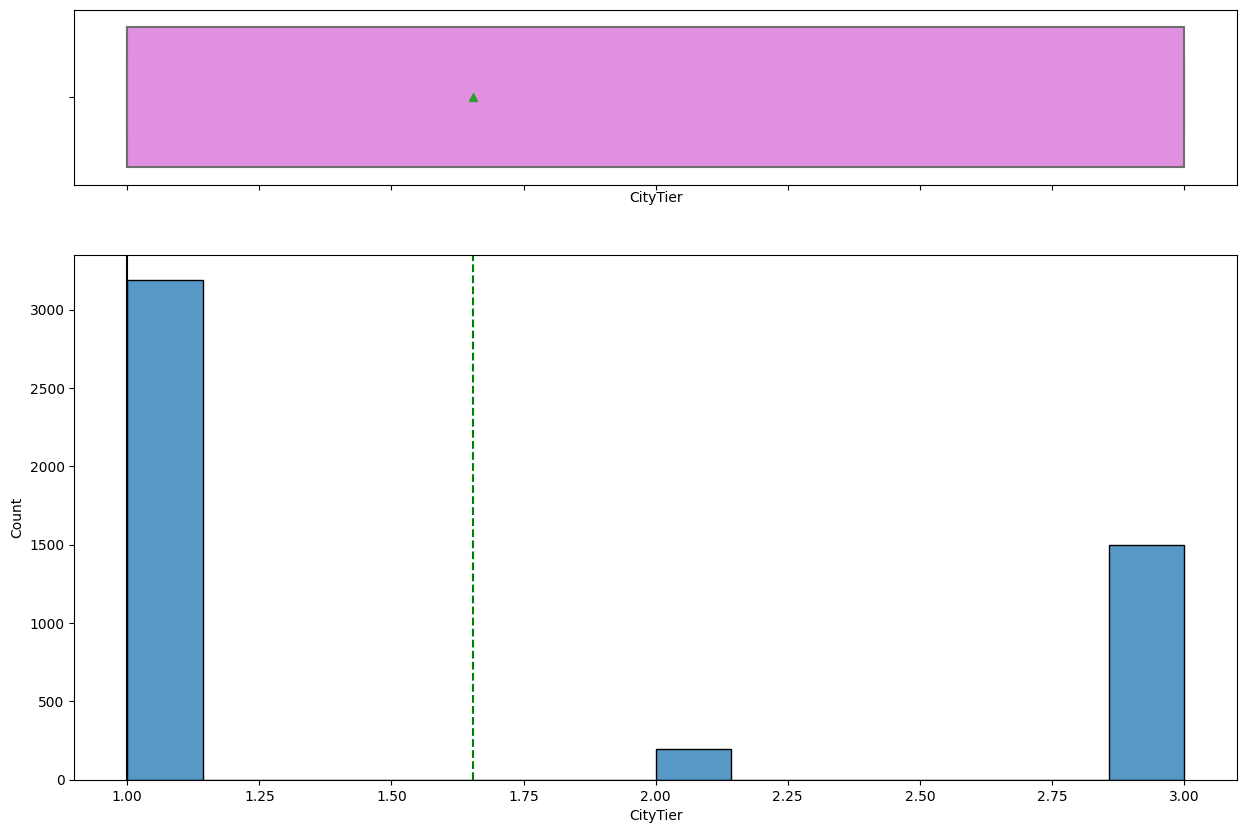

In [25]:
histogram_boxplot(data['CityTier'])

### Observation:
Most cities are well developed.

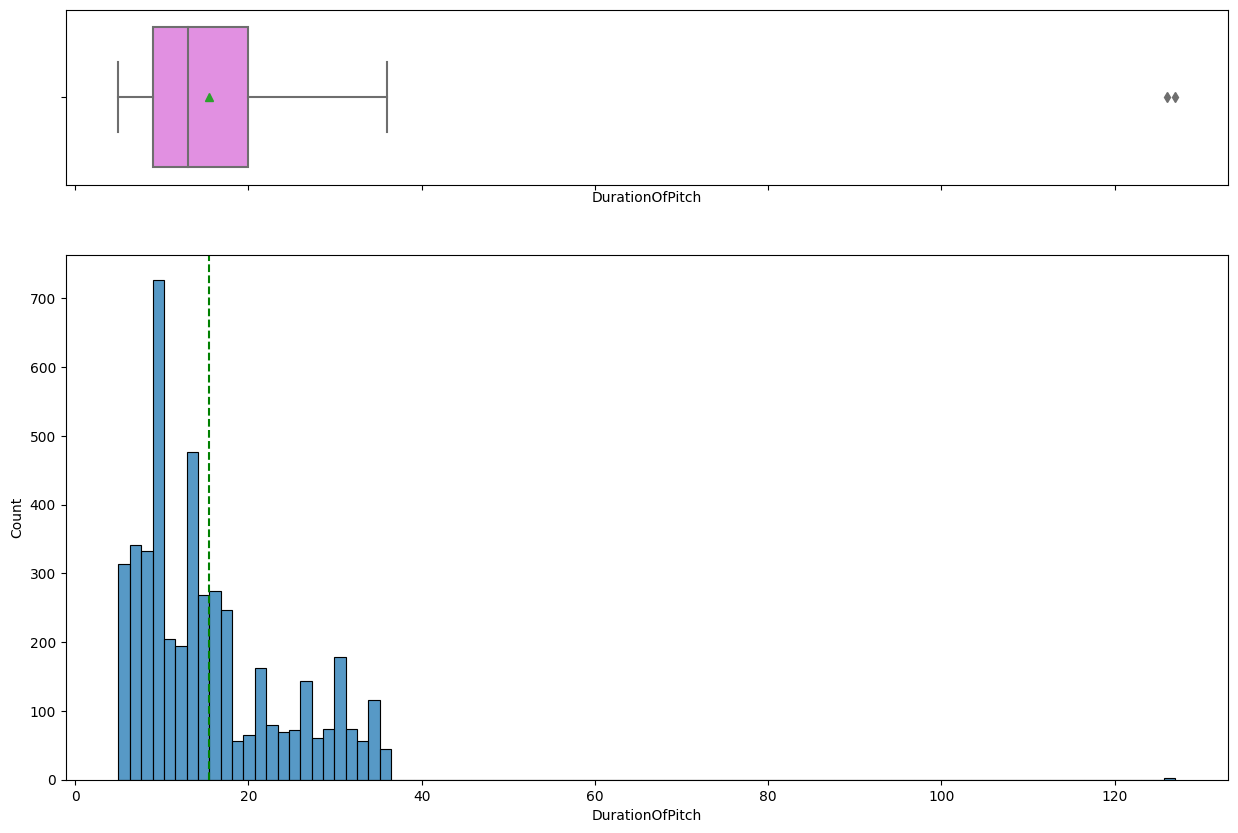

In [26]:
histogram_boxplot(data['DurationOfPitch'])

### Observations:
- The graph is right-skewed.
- The majority of the pitches are less than 20 minutes. 
- There is an outlier. 
- The average pitch is 15 miuntes. 

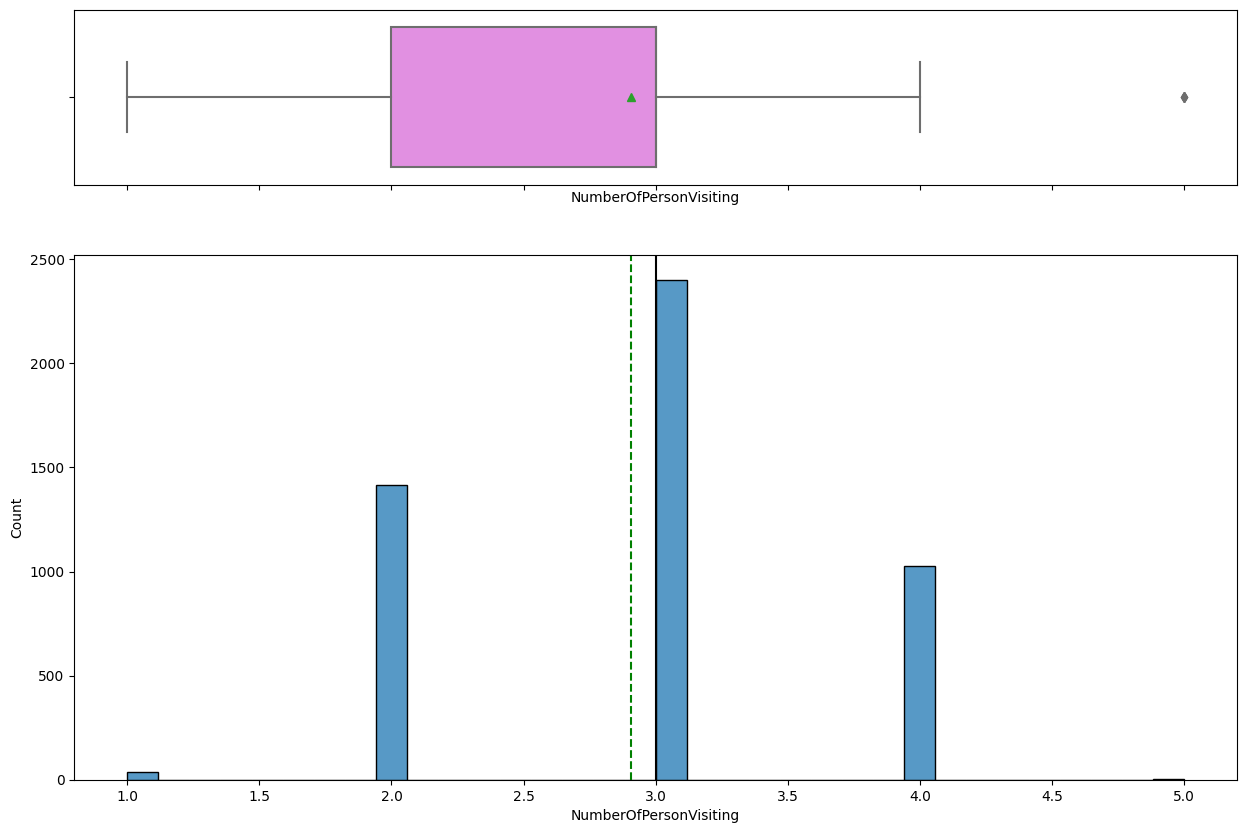

In [27]:
histogram_boxplot(data['NumberOfPersonVisiting'])

### Observations: 
- Most individuals travel with 3 people. 
- Very few people travel alone.

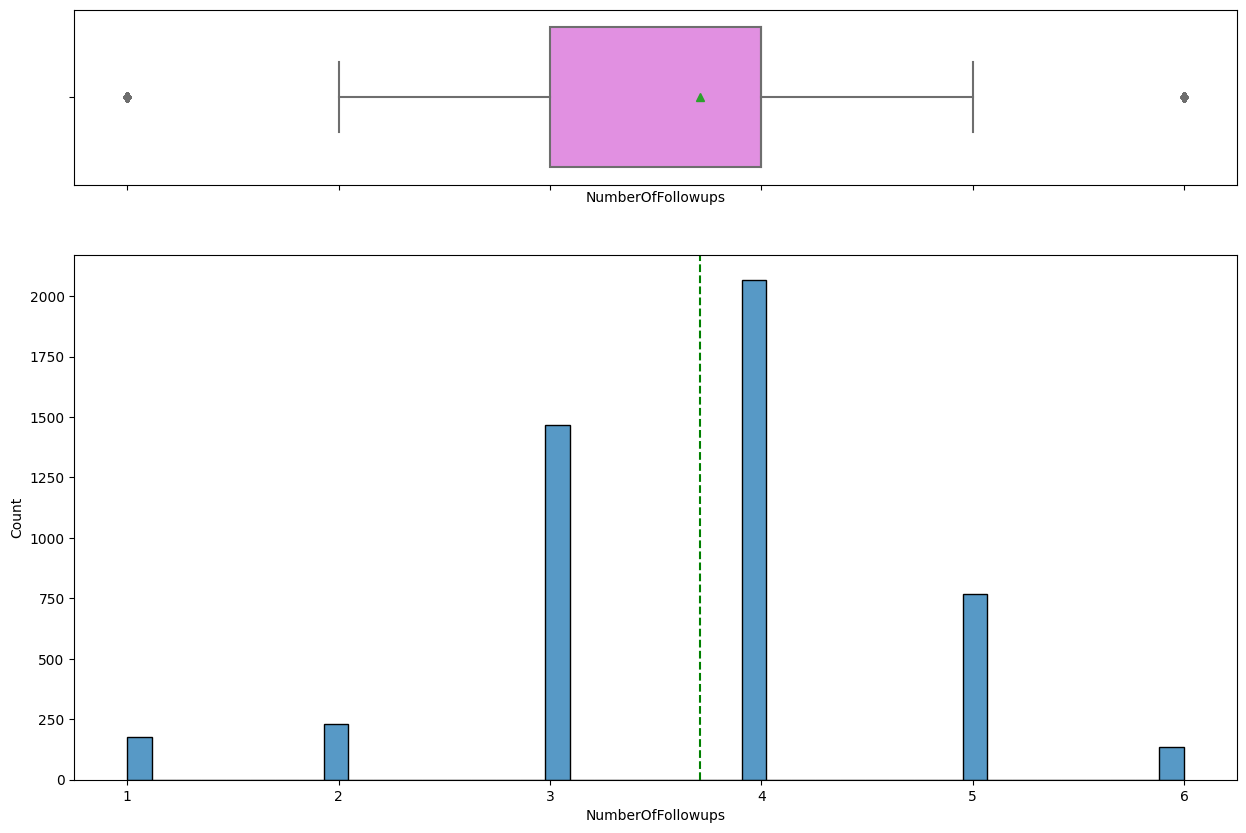

In [28]:
histogram_boxplot(data['NumberOfFollowups'])

### Observations:
- The graph is normally distributed. 
- Most sales people follow-up with customers more than average. 

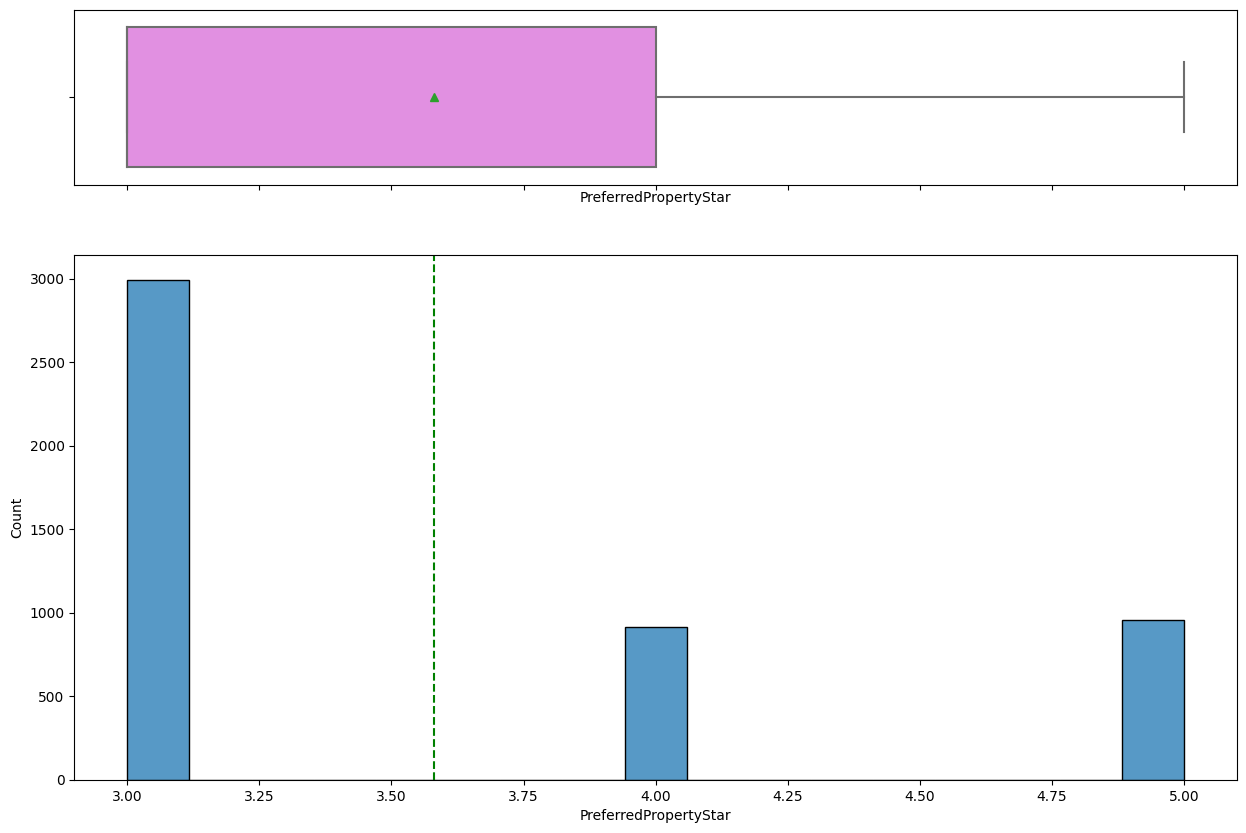

In [29]:
histogram_boxplot(data['PreferredPropertyStar'])

### Observations:
- 50% of the population prefer betweeb 3 and 4 star hotels. 
- Suprisingly 3 star hotels are the most common. 

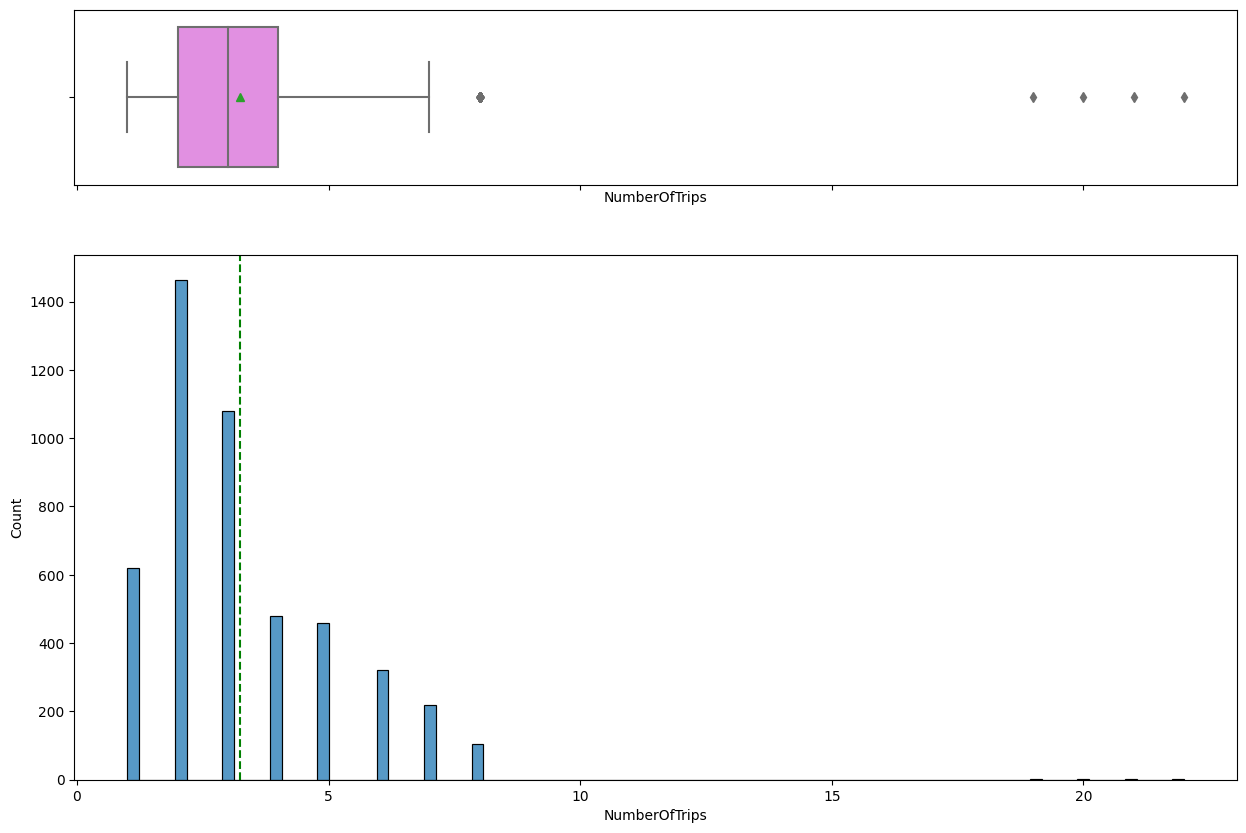

In [30]:
histogram_boxplot(data['NumberOfTrips'])

### Observation:
- The graph is right-skewed. 
- Most individuals have taken less than 5 trips. 
- There are some outliers.


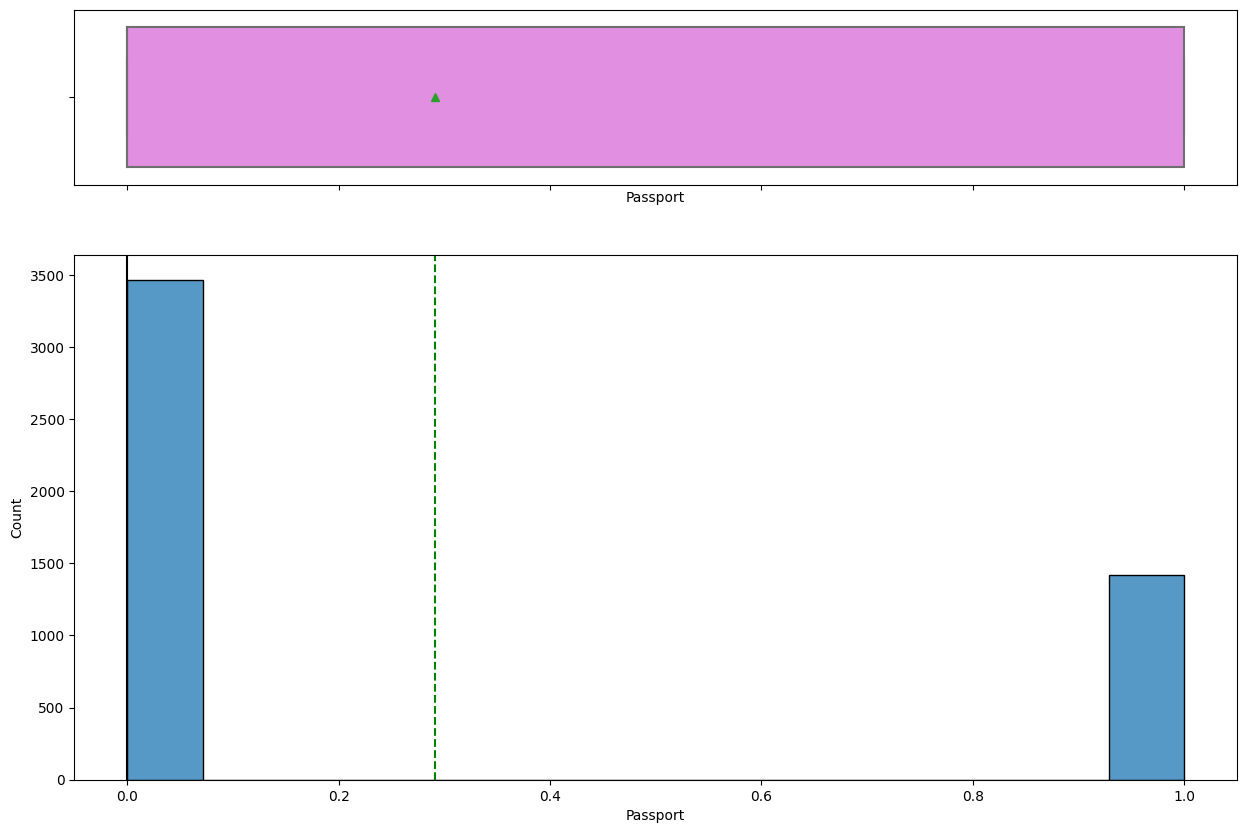

In [31]:
histogram_boxplot(data['Passport'])

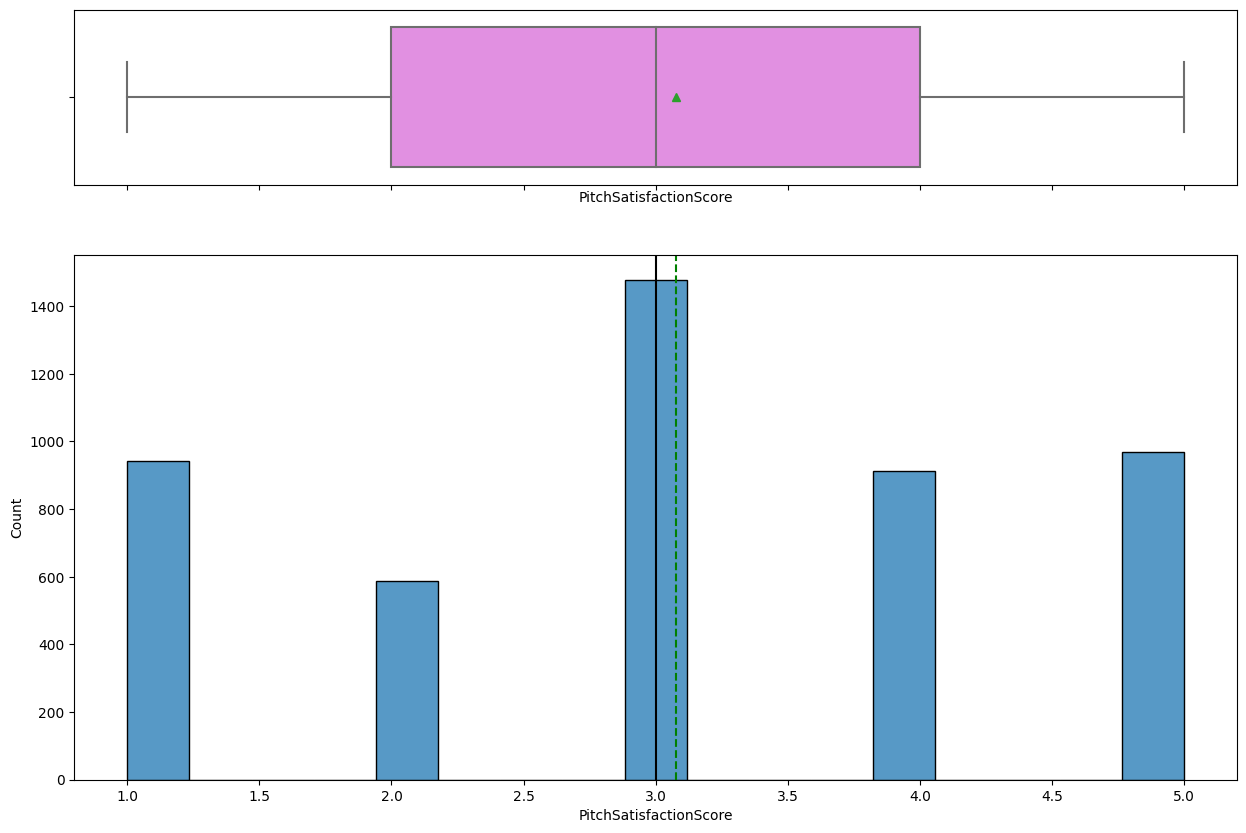

In [32]:
histogram_boxplot(data['PitchSatisfactionScore'])

### Observations:
- The average sales pitch satifaction score is 3. 


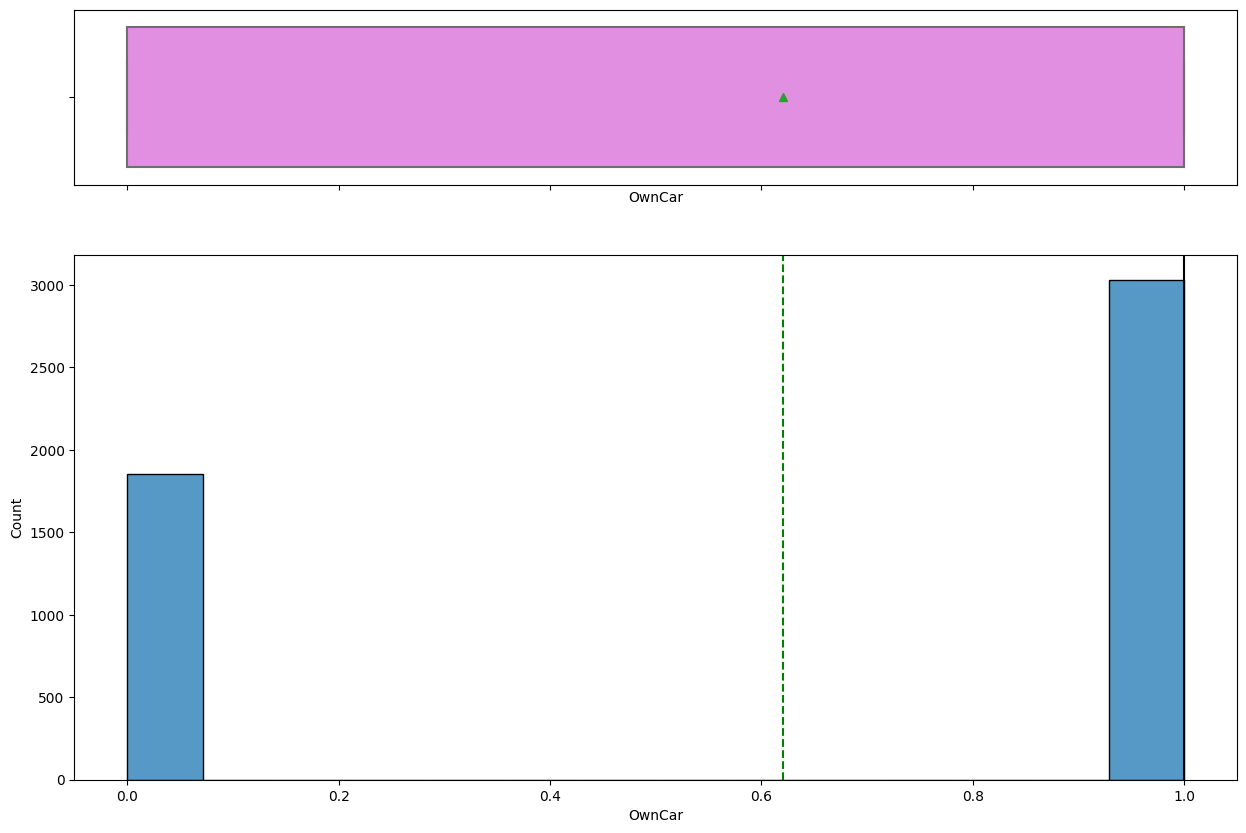

In [33]:
histogram_boxplot(data['OwnCar'])

### Observations:
Most individuals in this dataset do not own a car. 

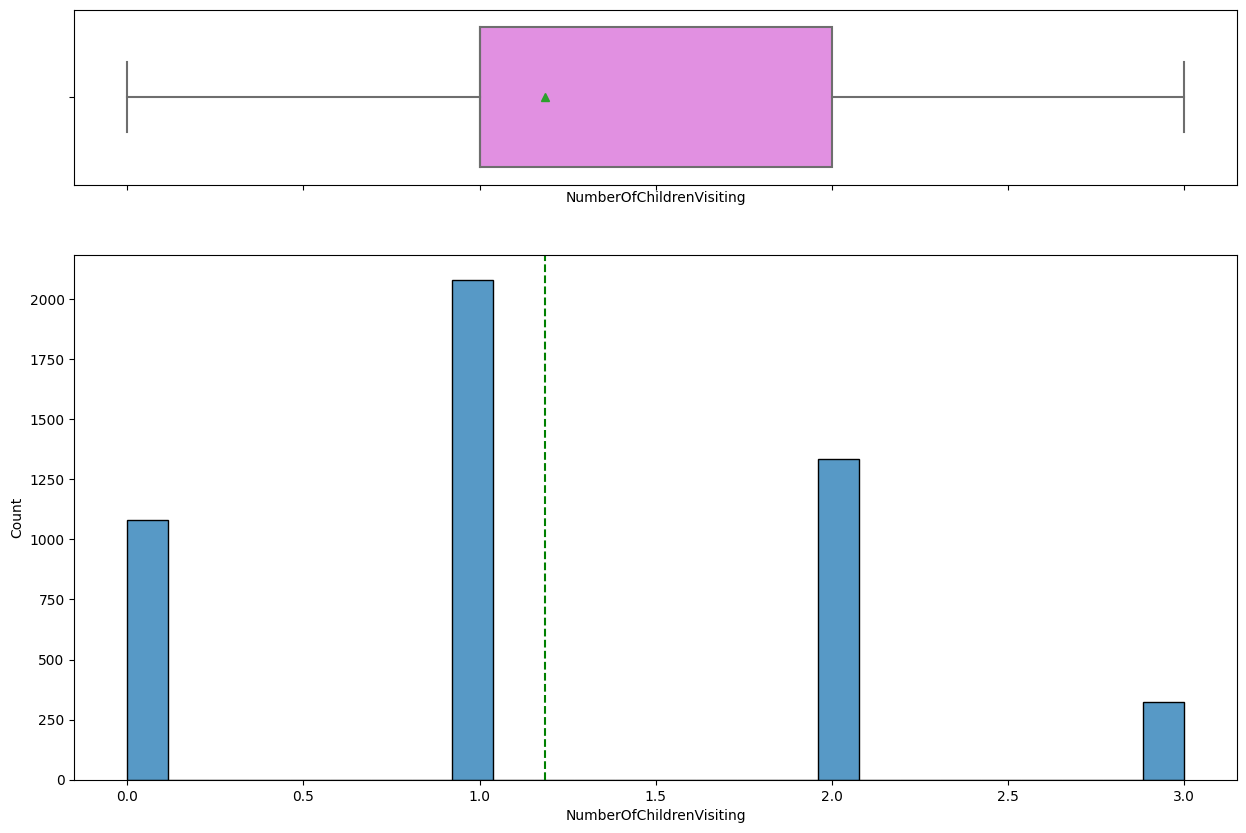

In [34]:
histogram_boxplot(data['NumberOfChildrenVisiting'])

### Observations:
Not many people travel with more than 2 children under 5. 

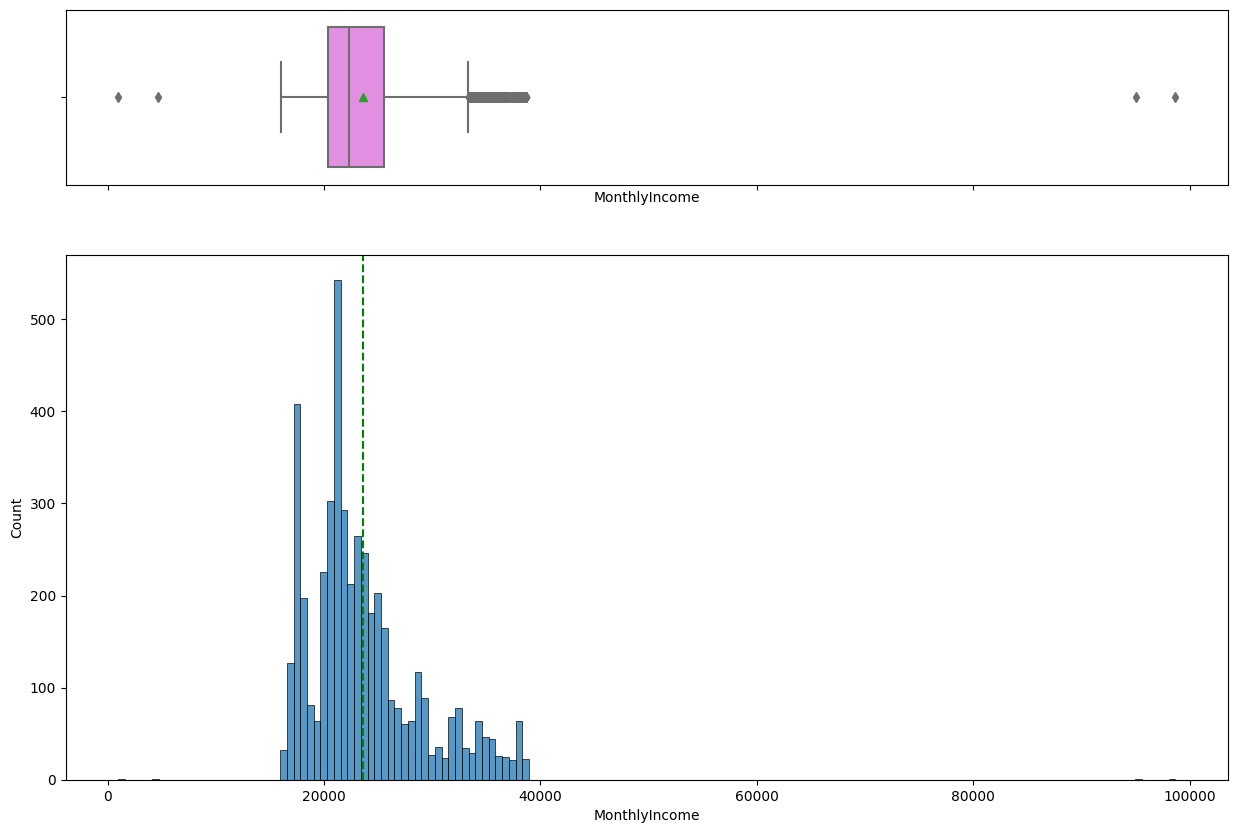

In [35]:
histogram_boxplot(data['MonthlyIncome'])

### Observations:
- The graph is right-skewed
- Most individuals make less than 25,000 a month. 

### 2. Categorical Features

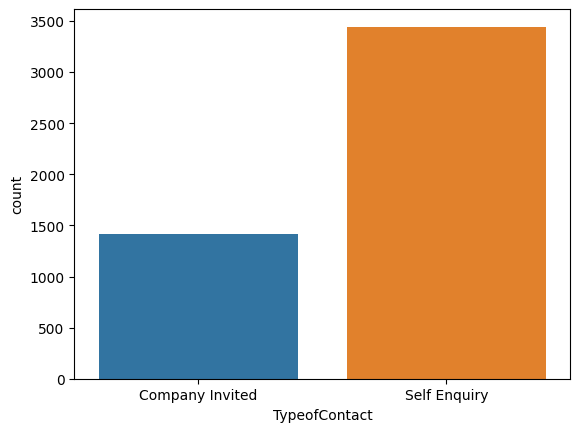

In [36]:
# Contact type
contact_type = sns.countplot(data = data, x="TypeofContact")

### Observations
It is more common for individuals to reach out to the tourism company, than it is for the tourism company to reach out to customers. 

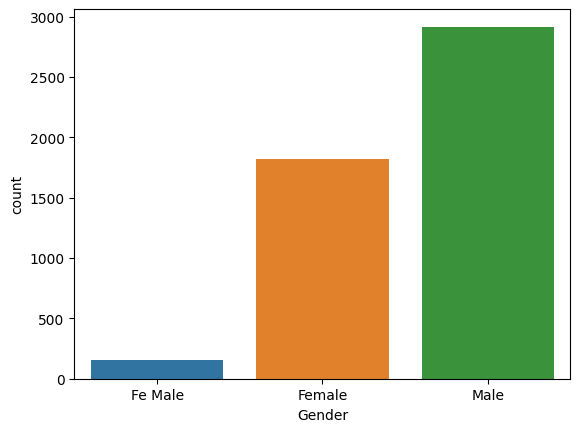

In [37]:
# Gender
gender = sns.countplot(data = data, x="Gender")

### Observations:
- Most of the individuals in this dataset are males. 
- There is a 3rd category called (Fe Male), Im thinking this covers the individuals that idetify as other. 

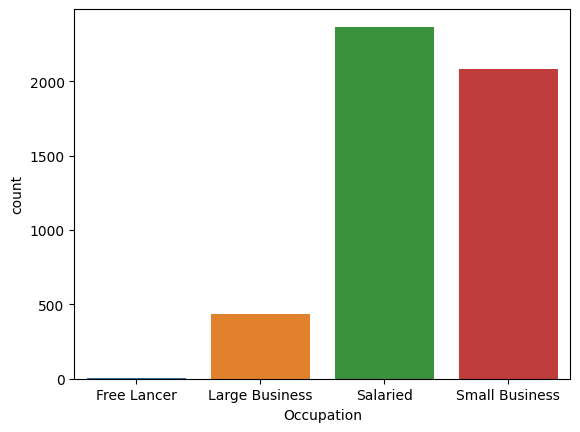

In [38]:
# Occupation
occupation = sns.countplot(data = data, x="Occupation")

### Observations:
Most individuals have an occupation that pays them a set salary. 

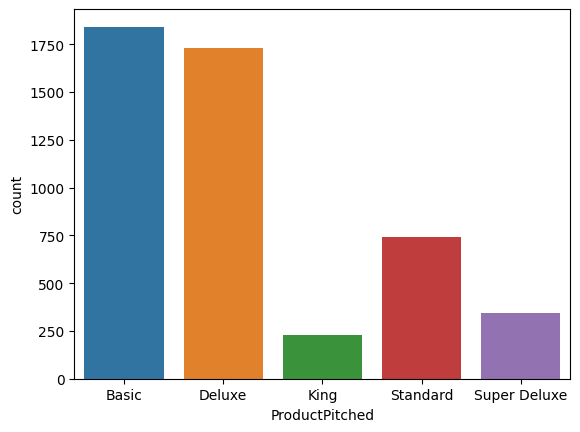

In [39]:
# Product pitched to customer 
contact_type = sns.countplot(data = data, x="ProductPitched")

### Observations: 
- The Basic package is the most pitched. 
- The graph is right-skewed.


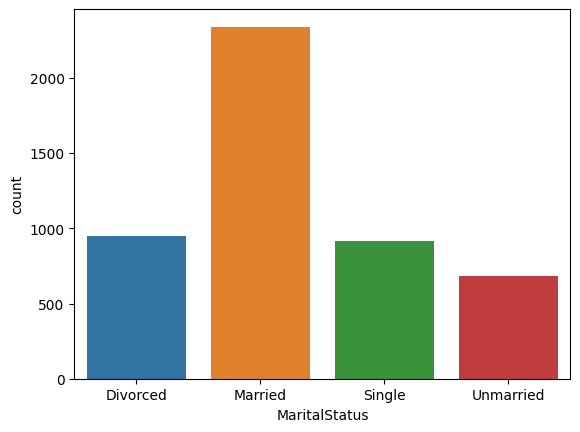

In [40]:
# Marital Status
MS = sns.countplot(data = data, x="MaritalStatus")

### Observations:
- Most individuals are married. 
- This could be the reason most individuals in this dataset most commonly travel with 2-3 people. 

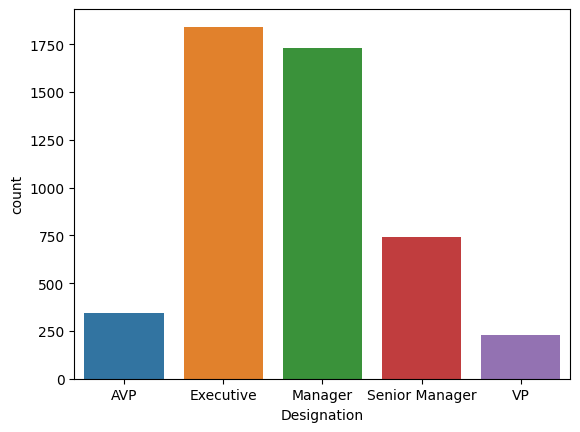

In [41]:
# Designation 
desig = sns.countplot(data = data, x="Designation")

### Observation:
- Designation is also right-skewed.
- Most individuals are executives for thr companies they work for. 

## Bivariate Analysis

### 1. Numerical Features

The target variable is whether or not a customer purchases a package(ProdTaken)

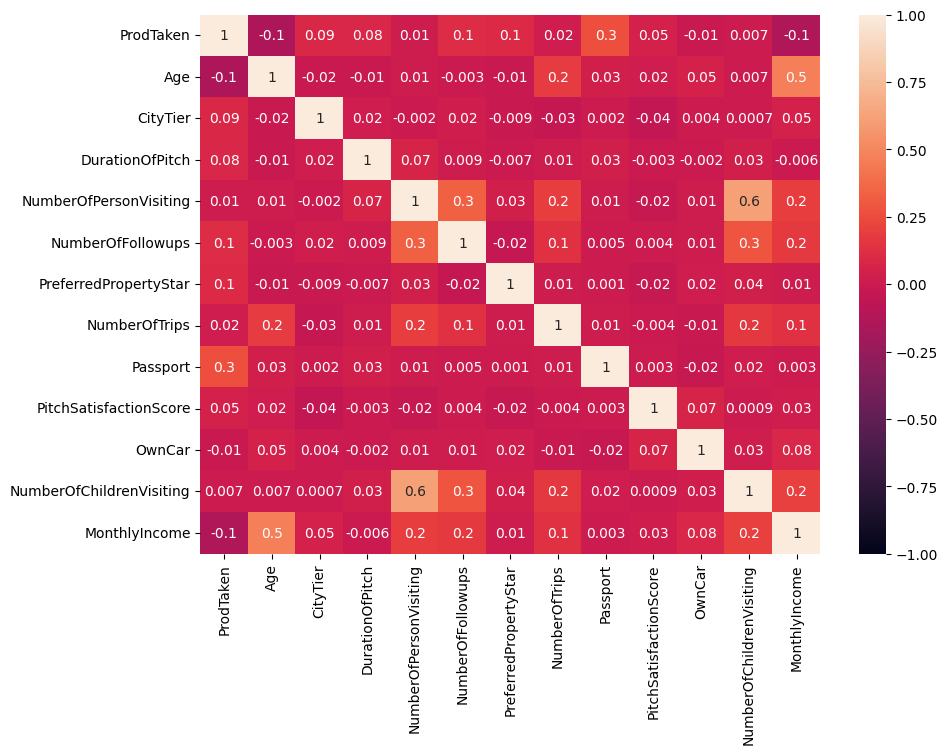

In [42]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

## Observations: 
- None of the numerical features have a high correlation with ProdTaken.
- Monthly Income and age have a 50% correlation.
- Number of children visiting and Number of people visit have a positive 60% correlation. 

In [43]:
data = data.drop(columns=['NumberOfChildrenVisiting'])

In [44]:
data

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,Executive,20289.0


In [45]:
## function to plot boxplots w.rt quality
def boxplot(x):
    plt.figure(figsize=(7,5))
    sns.boxplot(data['ProdTaken'],x,palette="PuBu")
    plt.show()

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ProdTaken               4888 non-null   int64   
 1   Age                     4662 non-null   float64 
 2   TypeofContact           4863 non-null   category
 3   CityTier                4888 non-null   int64   
 4   DurationOfPitch         4637 non-null   float64 
 5   Occupation              4888 non-null   category
 6   Gender                  4888 non-null   category
 7   NumberOfPersonVisiting  4888 non-null   int64   
 8   NumberOfFollowups       4843 non-null   float64 
 9   ProductPitched          4888 non-null   category
 10  PreferredPropertyStar   4862 non-null   float64 
 11  MaritalStatus           4888 non-null   category
 12  NumberOfTrips           4748 non-null   float64 
 13  Passport                4888 non-null   int64   
 14  PitchSatisfactionScore  

### 1. Numerical Features

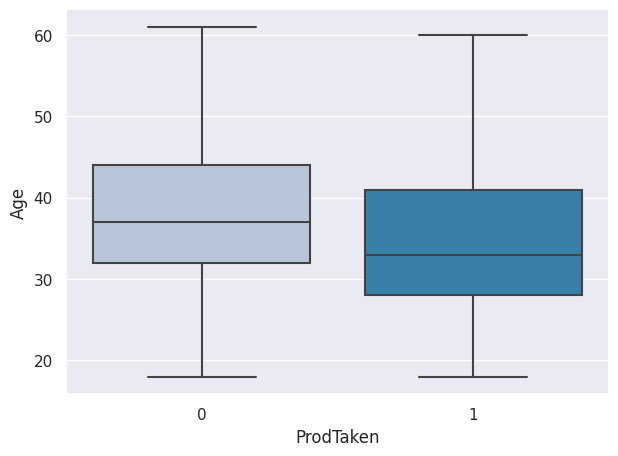

In [66]:
#Product Taken vs. Age
boxplot(data['Age'])

### Observations:
- Their is not much correlation between age and whether or not someone purchased a package. 
- 50% of individuals in both catgories are between the age 30-50. 


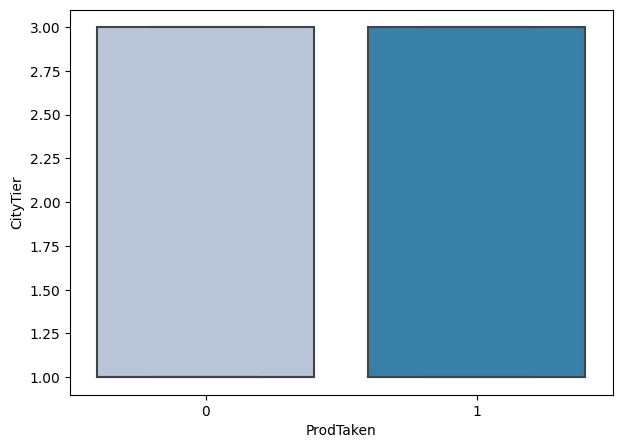

In [48]:
#Product Taken vs. City Tier
boxplot(data['CityTier'])

### Observations:
- 1 and 0 are the only two numerical values in this feature, which results in the above boxplot as the lower quartile is equal to the minimum value of 0, and the upper quartile is equal to the maximum value of 1 for each category. 
- Their is no correlation between the two features. 

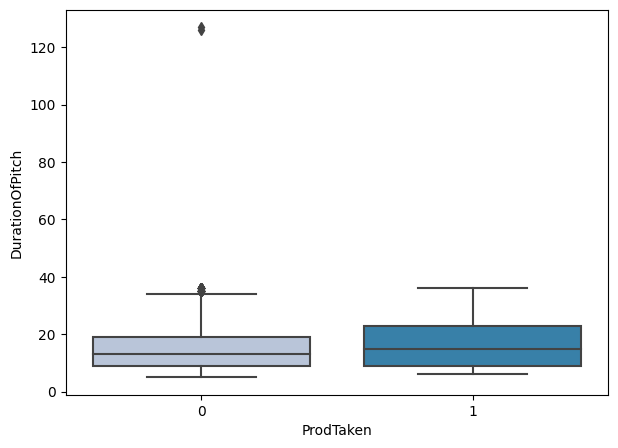

In [49]:
#Product Taken vs. Duration of pitch 
boxplot(data['DurationOfPitch'])

### Observations:
- Customers who didn't purchase packages have some outliers. 
- Their is no correlation between the features. 

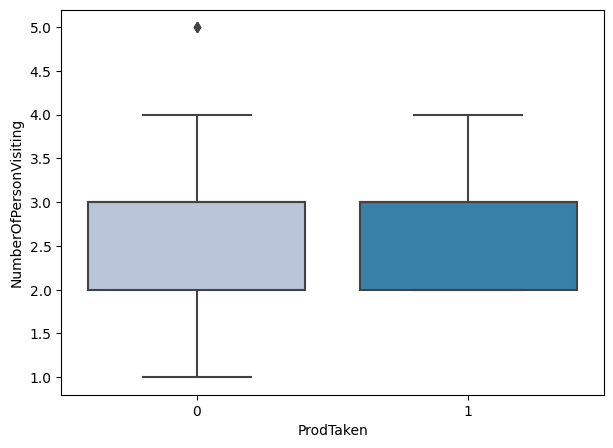

In [50]:
#Product Taken vs. Number of people visiting
boxplot(data['NumberOfPersonVisiting'])

### Observations:
- People who did purchase the package traveled with at least 2 people. 
- Their is no correlation between the features. 

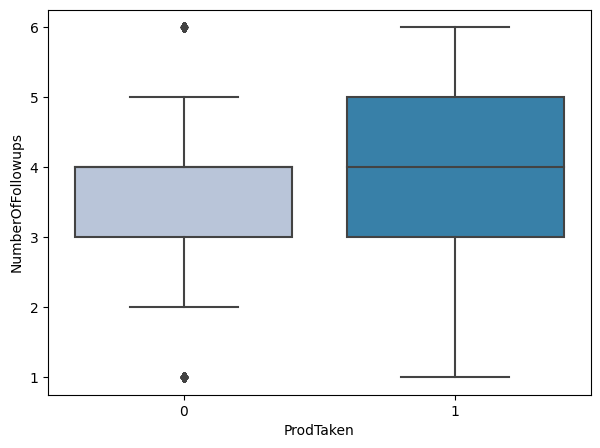

In [51]:
#Product Taken vs. Number of follow-ups
boxplot(data['NumberOfFollowups'])

### Observations:
- Individuals that did purchase the package have w wider range of follow-ups.
- 75% of individuals who purchased a package have been followed-up with at least 3 times. 

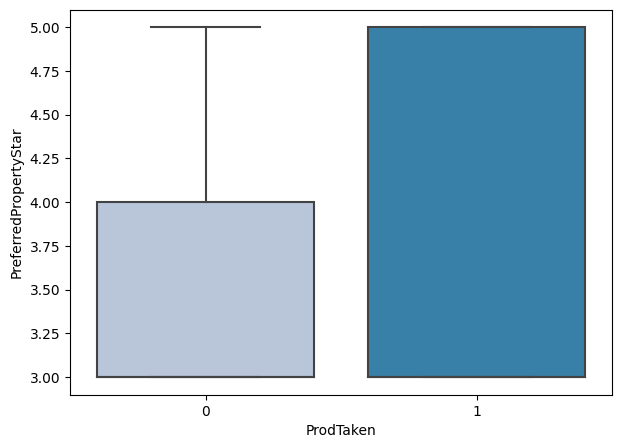

In [52]:
#Product Taken vs. Preferred Property Star 
boxplot(data['PreferredPropertyStar'])

### Observations:
- 3 stars is the minimum.
- Individuals who have purchased the package are more like to prefer a 5 star than the individual who did not purchase the package. 
- 50% of individuals who did not purchase the package prefer between 3 and 4 stars.

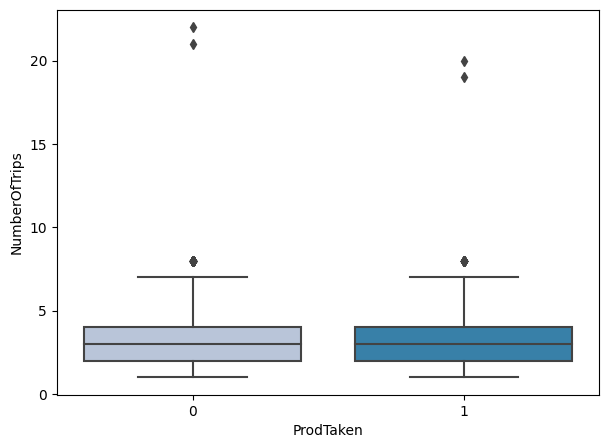

In [53]:
#Product Taken vs. Number of trips 
boxplot(data['NumberOfTrips'])

### Observations:
- Their are some outliers. 
- Their is no correlation between the variables. 
- 75% of individuals in both categories have taken less than 5 trips.

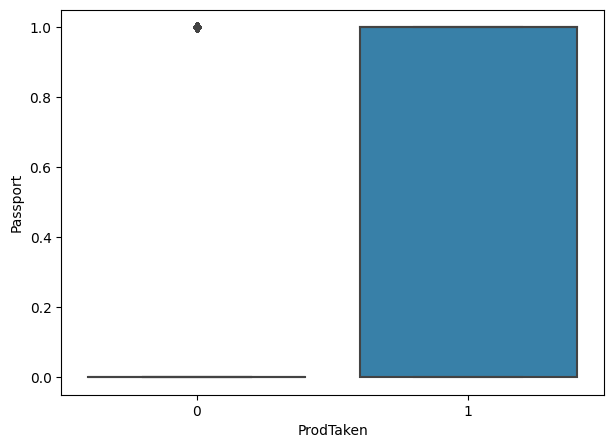

In [54]:
#Product Taken vs. Passport
boxplot(data['Passport'])

### Observations:
- All the individuals who purchased packages have passports. 
- The company should target individuals who already have passports. 

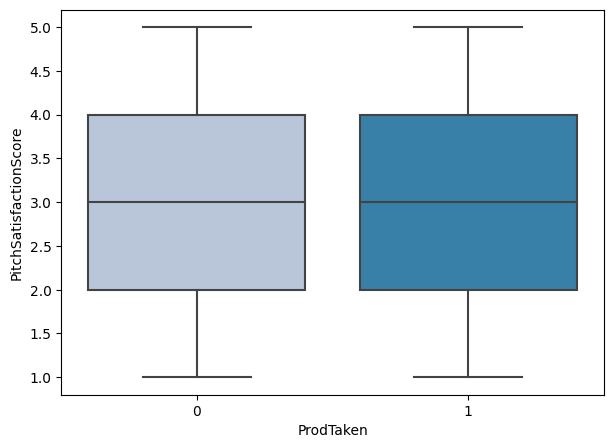

In [55]:
#Product Taken vs. Pitch satisfaction score 
boxplot(data['PitchSatisfactionScore'])

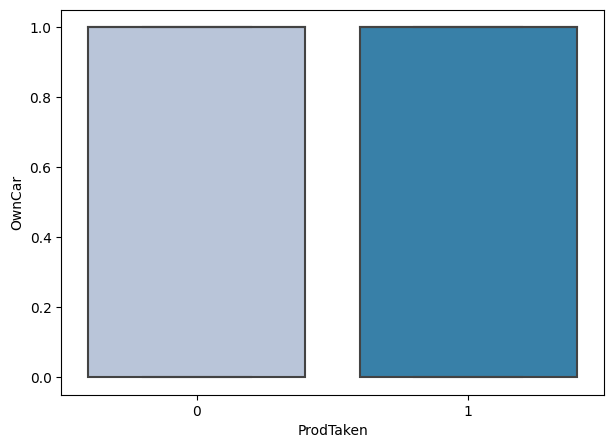

In [56]:
#Product Taken vs. Car owner
boxplot(data['OwnCar'])

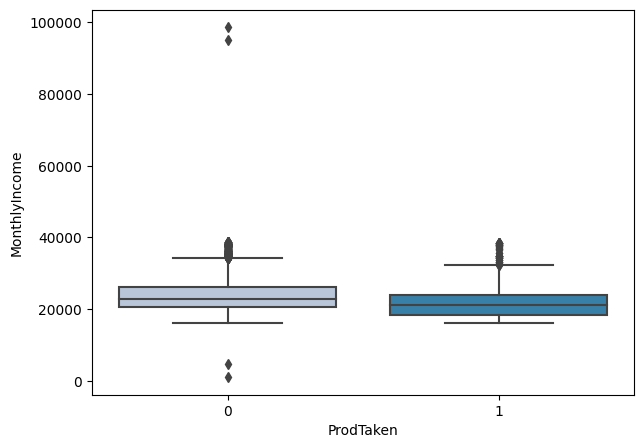

In [57]:
#Product Taken vs. Monthly income
boxplot(data['MonthlyIncome'])

### Observations: 
- Their are some outliers. 
- Almost everyone in the dataset makes less than 40,000/monthly. 

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ProdTaken               4888 non-null   int64   
 1   Age                     4662 non-null   float64 
 2   TypeofContact           4863 non-null   category
 3   CityTier                4888 non-null   int64   
 4   DurationOfPitch         4637 non-null   float64 
 5   Occupation              4888 non-null   category
 6   Gender                  4888 non-null   category
 7   NumberOfPersonVisiting  4888 non-null   int64   
 8   NumberOfFollowups       4843 non-null   float64 
 9   ProductPitched          4888 non-null   category
 10  PreferredPropertyStar   4862 non-null   float64 
 11  MaritalStatus           4888 non-null   category
 12  NumberOfTrips           4748 non-null   float64 
 13  Passport                4888 non-null   int64   
 14  PitchSatisfactionScore  

### 2. Categorical 

In [59]:
def stacked_plot(x):
    sns.set(palette="rocket")
    tab1 = pd.crosstab(x, data["ProdTaken"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["ProdTaken"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2837  607  3444
All              3946  917  4863
------------------------------------------------------------------------------------------------------------------------


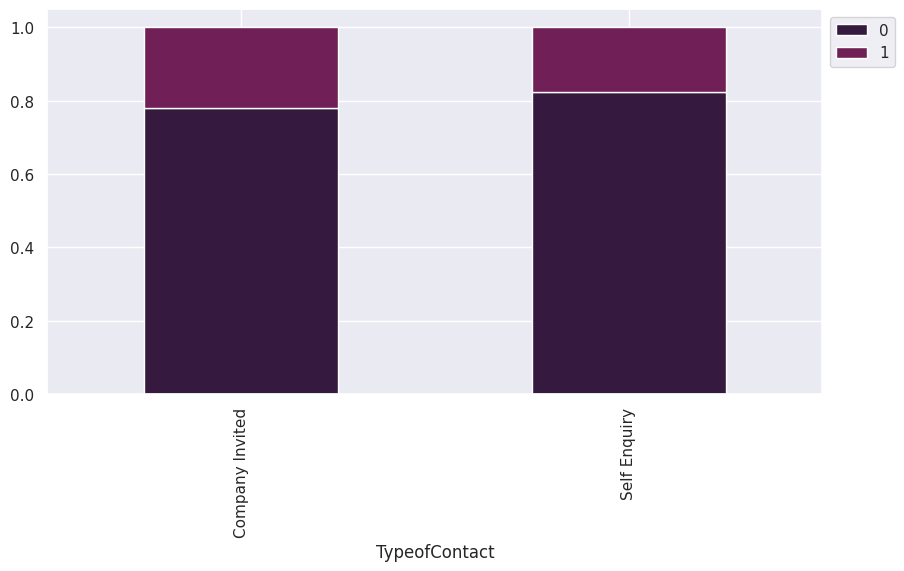

In [60]:
#Product Taken vs. Type of initial contact
stacked_plot(data['TypeofContact'])

### Observations:
- Their is no correlation between the features. 
- Majority of the dataset are from self enquiries. 
- The company should focus on upselling other packages besides basic since people are reaching out to the wanting to travel. 

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


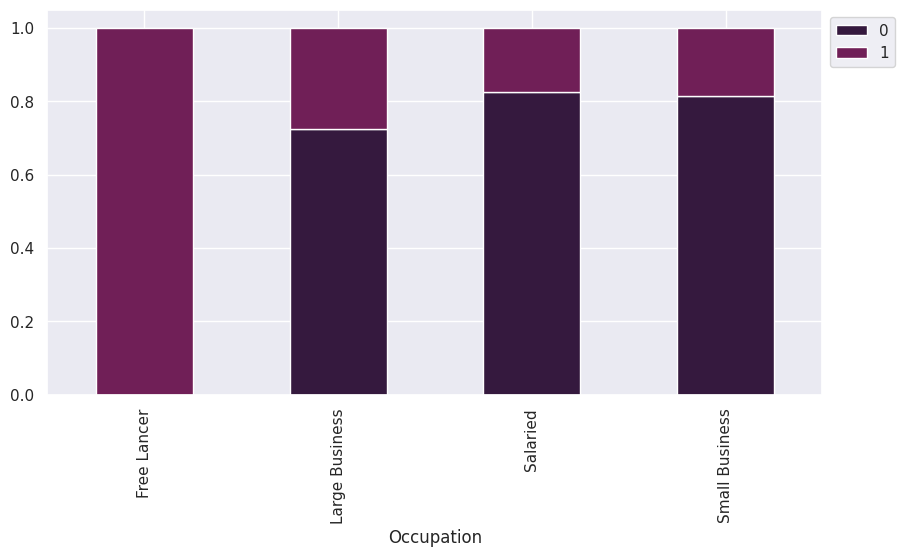

In [67]:
#Product Taken vs. Occupation 
stacked_plot(data['Occupation'])

### Observations:
- Only 2 individuals in the dataset are freelancers, however they both purchased packages. 
- Their is no obvious correlation between the variables. 



ProdTaken     0    1   All
Gender                    
Fe Male     130   25   155
Female     1500  317  1817
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


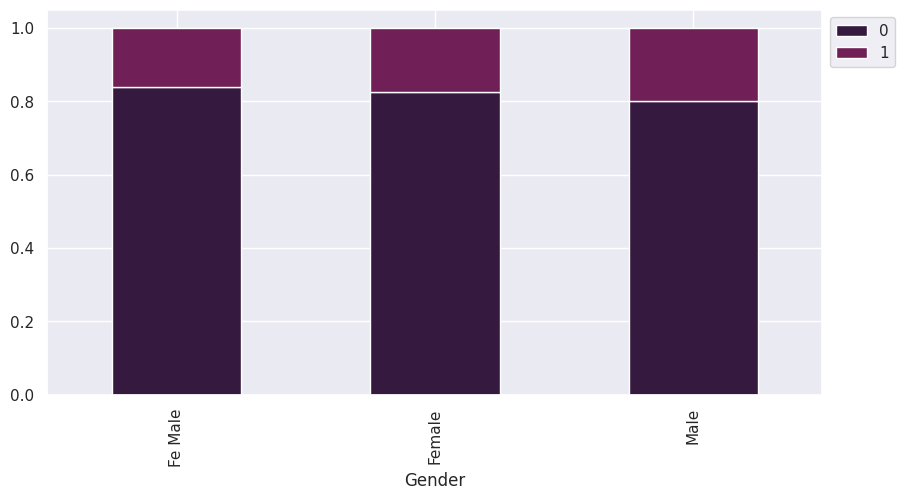

In [62]:
#Product Taken vs. Gender
stacked_plot(data['Gender'])

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


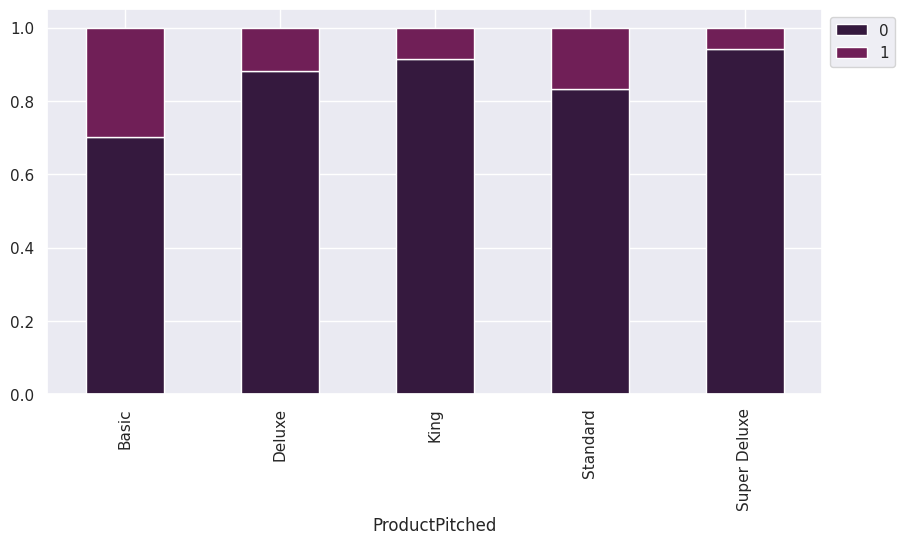

In [63]:
#Product Taken vs. Product Pitched
stacked_plot(data['ProductPitched'])

### Observation:
- Most individuals are pitched the basic package therefore it is the most purchased. 
- Deluxe is the 2nd most popular package instead of standard. 
- Sales men/women may be missing out on potential money buy not upselling the deluxe package.

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2511  482  2993
4.0                     731  182   913
5.0                     706  250   956
All                    3948  914  4862
------------------------------------------------------------------------------------------------------------------------


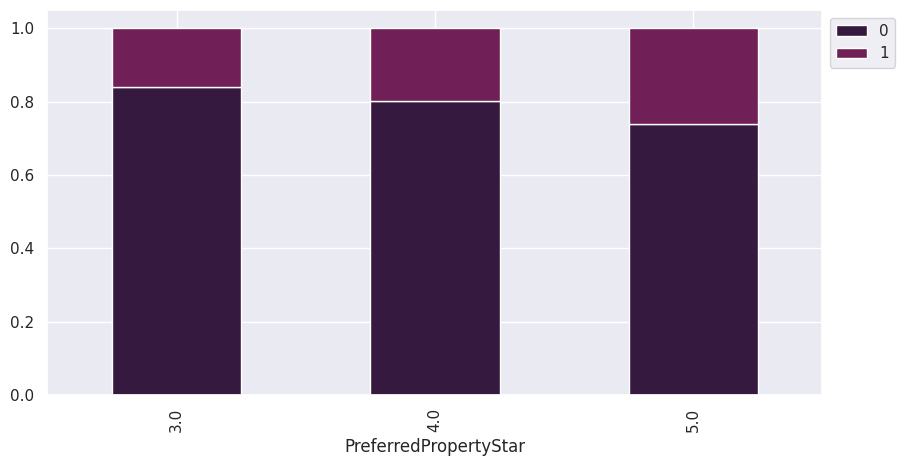

In [64]:
#Product Taken vs. Preferred Property Star
stacked_plot(data['PreferredPropertyStar'])

### Observations:
- Individuals who purchased are more likely to stay in a 5 star hotel than individuals that didnt purchase. 



ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


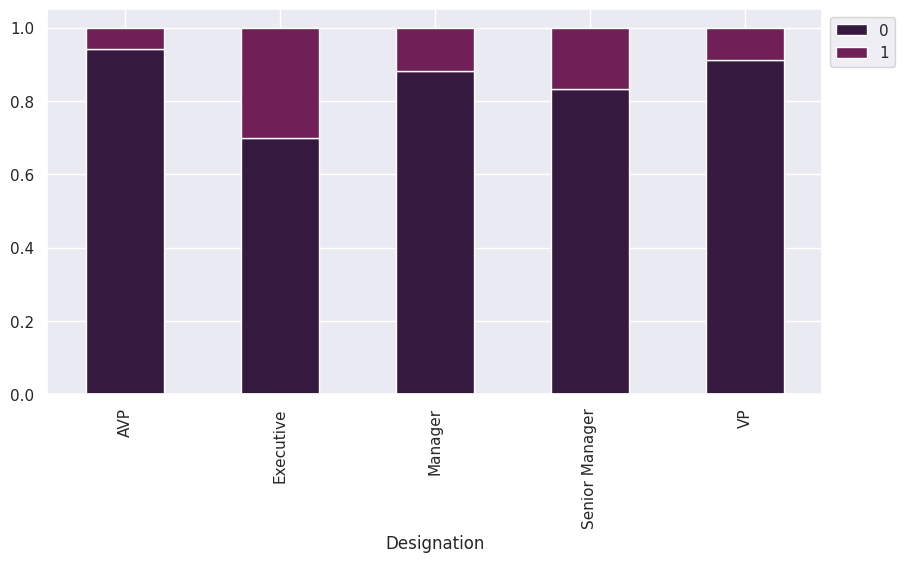

In [65]:
#Product Taken vs. Designation
stacked_plot(data['Designation'])

### Observations:
- Executives of companies are more likely to purchase packages, then comes managers. 

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


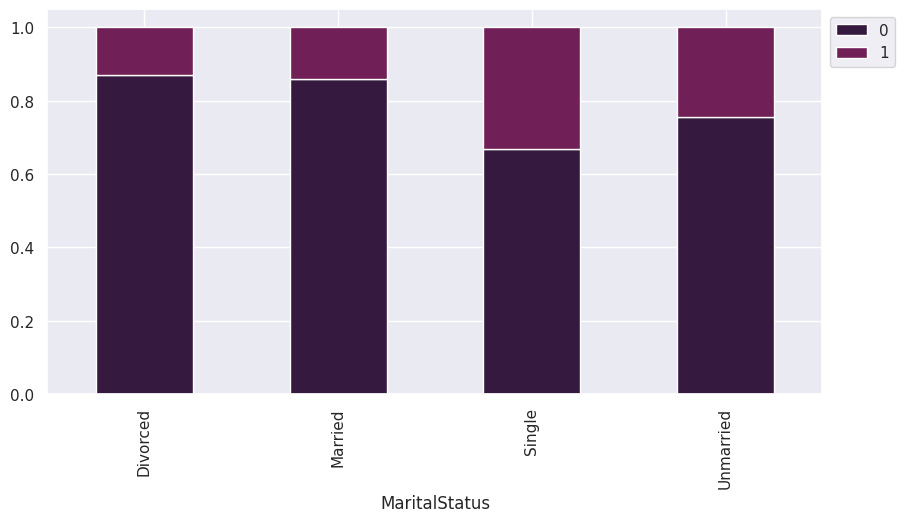

In [108]:
stacked_plot(data['MaritalStatus'])

# Data Pre-processing 
Taking care of the following:

1. Missing values
2. Dropping any features that are not effective in model building process and don't add any new knowledge 
3. Handling non-numerical values (categorical)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ProdTaken               4888 non-null   int64   
 1   Age                     4662 non-null   float64 
 2   TypeofContact           4863 non-null   category
 3   CityTier                4888 non-null   int64   
 4   DurationOfPitch         4637 non-null   float64 
 5   Occupation              4888 non-null   category
 6   Gender                  4888 non-null   category
 7   NumberOfPersonVisiting  4888 non-null   int64   
 8   NumberOfFollowups       4843 non-null   float64 
 9   ProductPitched          4888 non-null   category
 10  PreferredPropertyStar   4862 non-null   float64 
 11  MaritalStatus           4888 non-null   category
 12  NumberOfTrips           4748 non-null   float64 
 13  Passport                4888 non-null   int64   
 14  PitchSatisfactionScore  

### Handling non-numerical values (categorical)

In [69]:
# creating dummy varibles
dummy_data = pd.get_dummies(
    data,
    columns=[
        "TypeofContact",
        "Occupation",
        "Gender",
        "ProductPitched",
        "MaritalStatus",
        "Designation" 
        
    ],
    drop_first=True,
)
dummy_data.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,0,1,0,0,1,0,0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,...,0,0,0,0,0,0,0,1,0,0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,0,1,0,1,0,0,0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,...,0,0,0,0,0,0,1,0,0,0
4,0,NaN,1,8.0,2,3.0,4.0,1.0,0,5,...,0,0,0,0,0,0,1,0,0,0


Observations:
1. The dummy variables allow the categorical variables to be included in the models. 
2. The observations for those categorical columns are now columns with intergers. 


In [70]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ProdTaken                    4888 non-null   int64  
 1   Age                          4662 non-null   float64
 2   CityTier                     4888 non-null   int64  
 3   DurationOfPitch              4637 non-null   float64
 4   NumberOfPersonVisiting       4888 non-null   int64  
 5   NumberOfFollowups            4843 non-null   float64
 6   PreferredPropertyStar        4862 non-null   float64
 7   NumberOfTrips                4748 non-null   float64
 8   Passport                     4888 non-null   int64  
 9   PitchSatisfactionScore       4888 non-null   int64  
 10  OwnCar                       4888 non-null   int64  
 11  MonthlyIncome                4655 non-null   float64
 12  TypeofContact_Self Enquiry   4888 non-null   uint8  
 13  Occupation_Large B

All of the columns are now intergers. 

# Model Building Approach
1. Data preparation
2. Split the data into train and test set
3. Build a CART (Classification and regression trees) model on the train data
4. Tune the model and prune the tree, if required
5. Test the data on test set

### Treat missing values
* We will use SimpleImputer to impute values for NaN. 
* Strategy will be set to 'most_frequent', which will replace missing values with the most frequent value in the column. 


In [71]:
imputer = SimpleImputer(strategy="most_frequent")


# Defining X and Y

In [72]:
X = dummy_data.drop(["ProdTaken"], axis=1)

Y = dummy_data["ProdTaken"]

# Splitting the data

In [73]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.3, random_state=1,stratify=Y)
print(X_train.shape, X_test.shape)

(3421, 28) (1467, 28)


In [74]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ProdTaken                    4888 non-null   int64  
 1   Age                          4662 non-null   float64
 2   CityTier                     4888 non-null   int64  
 3   DurationOfPitch              4637 non-null   float64
 4   NumberOfPersonVisiting       4888 non-null   int64  
 5   NumberOfFollowups            4843 non-null   float64
 6   PreferredPropertyStar        4862 non-null   float64
 7   NumberOfTrips                4748 non-null   float64
 8   Passport                     4888 non-null   int64  
 9   PitchSatisfactionScore       4888 non-null   int64  
 10  OwnCar                       4888 non-null   int64  
 11  MonthlyIncome                4655 non-null   float64
 12  TypeofContact_Self Enquiry   4888 non-null   uint8  
 13  Occupation_Large B

In [75]:
y_train.value_counts(1)

0    0.811751
1    0.188249
Name: ProdTaken, dtype: float64

In [76]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

The test and training set have the same distribution.

# Creating a variable for all the missing values. 

In [77]:
dummy_data.isnull().sum()

ProdTaken                        0
Age                            226
CityTier                         0
DurationOfPitch                251
NumberOfPersonVisiting           0
NumberOfFollowups               45
PreferredPropertyStar           26
NumberOfTrips                  140
Passport                         0
PitchSatisfactionScore           0
OwnCar                           0
MonthlyIncome                  233
TypeofContact_Self Enquiry       0
Occupation_Large Business        0
Occupation_Salaried              0
Occupation_Small Business        0
Gender_Female                    0
Gender_Male                      0
ProductPitched_Deluxe            0
ProductPitched_King              0
ProductPitched_Standard          0
ProductPitched_Super Deluxe      0
MaritalStatus_Married            0
MaritalStatus_Single             0
MaritalStatus_Unmarried          0
Designation_Executive            0
Designation_Manager              0
Designation_Senior Manager       0
Designation_VP      

In [78]:
cols_for_impute = [
    'Age',
    'DurationOfPitch',
    'NumberOfFollowups',
    'PreferredPropertyStar',
    'NumberOfTrips',
    'MonthlyIncome'
]

In [79]:
dummy_data[cols_for_impute].head()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,MonthlyIncome
0,41.0,6.0,3.0,3.0,1.0,20993.0
1,49.0,14.0,4.0,4.0,2.0,20130.0
2,37.0,8.0,4.0,3.0,7.0,17090.0
3,33.0,9.0,3.0,3.0,2.0,17909.0
4,NaN,8.0,3.0,4.0,1.0,18468.0


# Imputing Missing values
Imputing the missing values with the most frequent value in each column. 


In [80]:
X_train[cols_for_impute] = imputer.fit_transform(X_train[cols_for_impute])
X_test[cols_for_impute] = imputer.transform(X_test[cols_for_impute])

In [81]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3421
Number of rows in test data = 1467


Checking for missing values. 

In [82]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Age                            0
CityTier                       0
DurationOfPitch                0
NumberOfPersonVisiting         0
NumberOfFollowups              0
PreferredPropertyStar          0
NumberOfTrips                  0
Passport                       0
PitchSatisfactionScore         0
OwnCar                         0
MonthlyIncome                  0
TypeofContact_Self Enquiry     0
Occupation_Large Business      0
Occupation_Salaried            0
Occupation_Small Business      0
Gender_Female                  0
Gender_Male                    0
ProductPitched_Deluxe          0
ProductPitched_King            0
ProductPitched_Standard        0
ProductPitched_Super Deluxe    0
MaritalStatus_Married          0
MaritalStatus_Single           0
MaritalStatus_Unmarried        0
Designation_Executive          0
Designation_Manager            0
Designation_Senior Manager     0
Designation_VP                 0
dtype: int64
------------------------------
Age                            0

Their are no missing values. 

## Model evaluation criterion

### Model can make wrong predictions if:
1. Predicting an individual will not purchase a package and they actually do. 
2. Predicting an individual will purchase a package and they dont. 

### Which case is more important? 
1. If the model predicts an individual will not purchase a package and they do purchase a package the company could pass up a potential customer by overlooking him/her. The company could also miss the chance to upsell and make more money. 
2. If the model predicts an individual will purchase a package and they don't they may have wasted resources advertising to the wrong person. 

### Which metric is important to optimize?
1. We want the minimum amount of false negatives as possible, therefore we will use the recall score as our metric of measurement. 


#Function for metric scores and confusion matrix

In [83]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [84]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Decision Tree Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.8861622358554874
Recall on training set :  1.0
Recall on test set :  0.7028985507246377
Precision on training set :  1.0
Precision on test set :  0.6953405017921147
F1-Score on training set :  1.0
F1-Score on test set :  0.6990990990990991


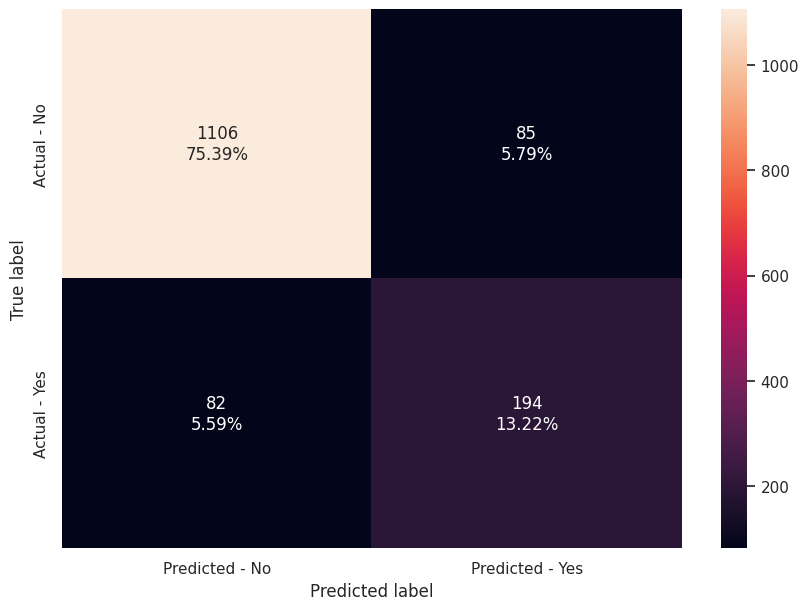

In [85]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

Observations:
- Decision Tree is overfitting the training set. 
- I will try hpyerparameter tuning the model using GridSearch.

### Hyperparameter Tuning

In [86]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=6,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

Accuracy on training set :  0.779888921368021
Accuracy on test set :  0.7893660531697342
Recall on training set :  0.6490683229813664
Recall on test set :  0.6594202898550725
Precision on training set :  0.44232804232804235
Precision on test set :  0.45843828715365237
F1-Score on training set :  0.526117054751416
F1-Score on test set :  0.5408618127786033


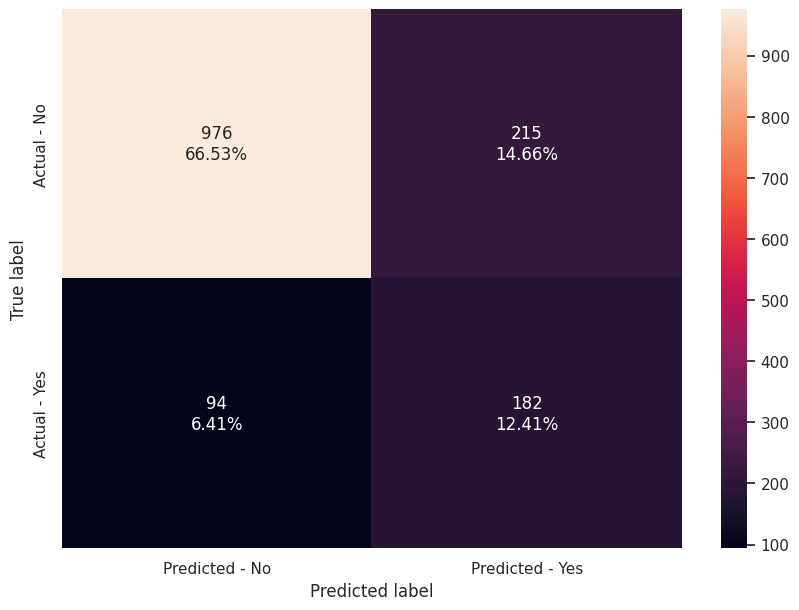

In [87]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

Observations: 
- The training and test set have very little difference between the recall score. 



## Random Forest Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.9209270620313565
Recall on training set :  1.0
Recall on test set :  0.6123188405797102
Precision on training set :  1.0
Precision on test set :  0.949438202247191
F1-Score on training set :  1.0
F1-Score on test set :  0.7444933920704846


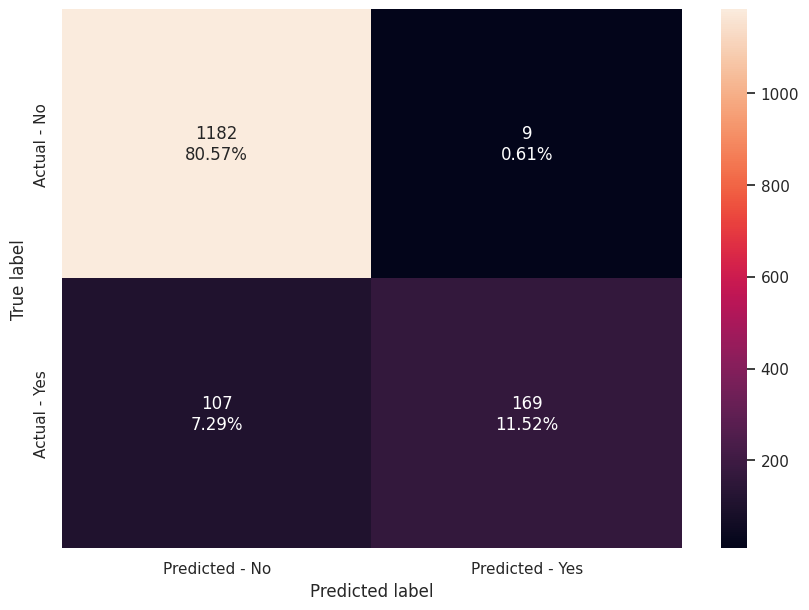

In [88]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

Observations:
1. The Random Forest classifier overfits the training set. 

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

Accuracy on training set :  0.7687810581701257
Accuracy on test set :  0.7586912065439673
Recall on training set :  0.7717391304347826
Recall on test set :  0.7644927536231884
Precision on training set :  0.43558282208588955
Precision on test set :  0.422
F1-Score on training set :  0.5568627450980392
F1-Score on test set :  0.5438144329896907


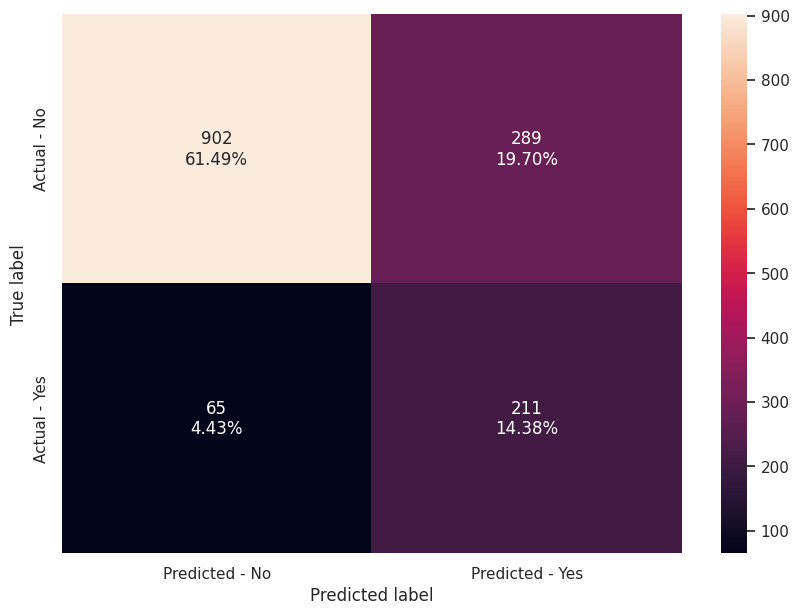

In [90]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

Observations: 
1. Hyperparameter tunning has made the model less over fit. 
2. The recall score is 77& on the training set and 76% on the test set. 
3. The model has a low percision score. 


## Bagging Classifier

Accuracy on training set :  0.9929845074539608
Accuracy on test set :  0.9188820722563054
Recall on training set :  0.968944099378882
Recall on test set :  0.644927536231884
Precision on training set :  0.9936305732484076
Precision on test set :  0.8944723618090452
F1-Score on training set :  0.9811320754716981
F1-Score on test set :  0.7494736842105264


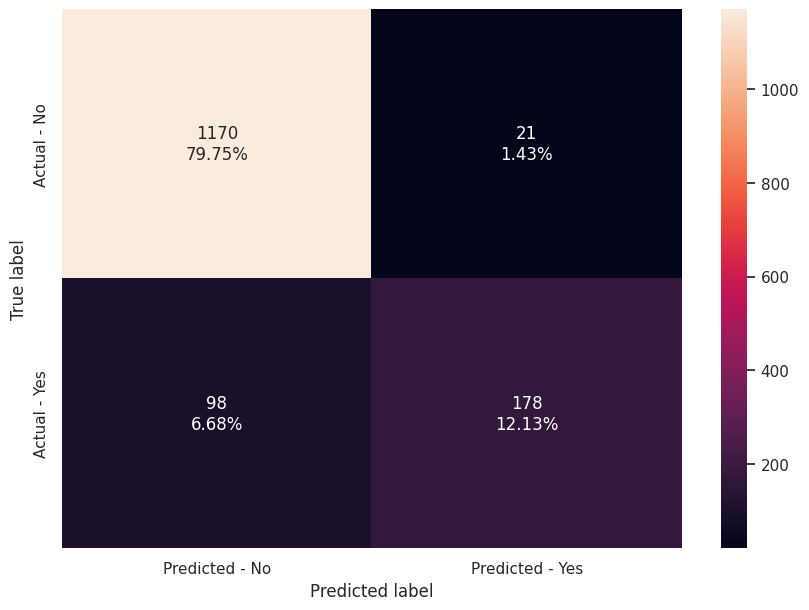

In [91]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

Observations:
1. The recall score has a 33% difference.
2. The model is overfitting the training set. 
3. Next I will hyperparameter tune the model

### Hyperparameter Tuning

In [92]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9216087252897068
Recall on training set :  0.9968944099378882
Recall on test set :  0.6521739130434783
Precision on training set :  1.0
Precision on test set :  0.9045226130653267
F1-Score on training set :  0.9984447900466563
F1-Score on test set :  0.7578947368421052


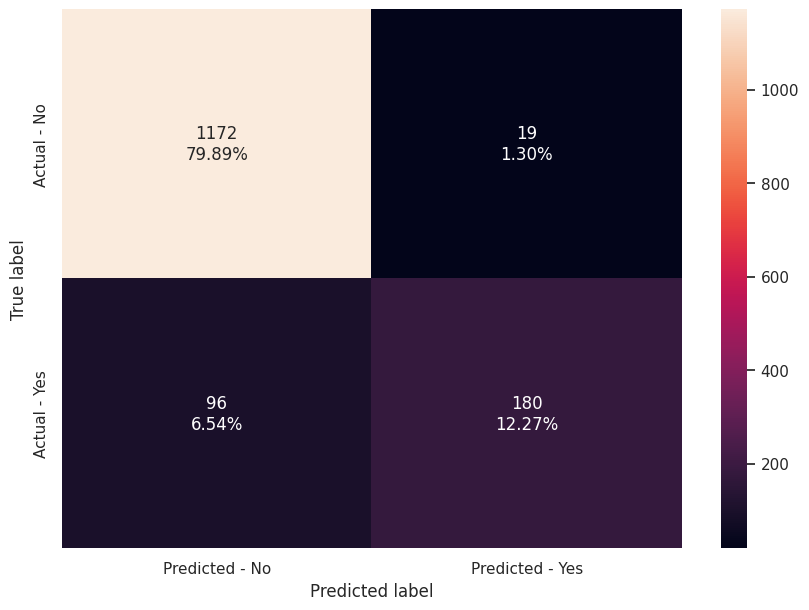

In [93]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

Observation:
1. The model did not improve very much.

## AdaBoost Classifier

Accuracy on training set :  0.8477053493130664
Accuracy on test set :  0.8452624403544649
Recall on training set :  0.3307453416149068
Recall on test set :  0.32608695652173914
Precision on training set :  0.7029702970297029
Precision on test set :  0.6870229007633588
F1-Score on training set :  0.44984160506863774
F1-Score on test set :  0.44226044226044225


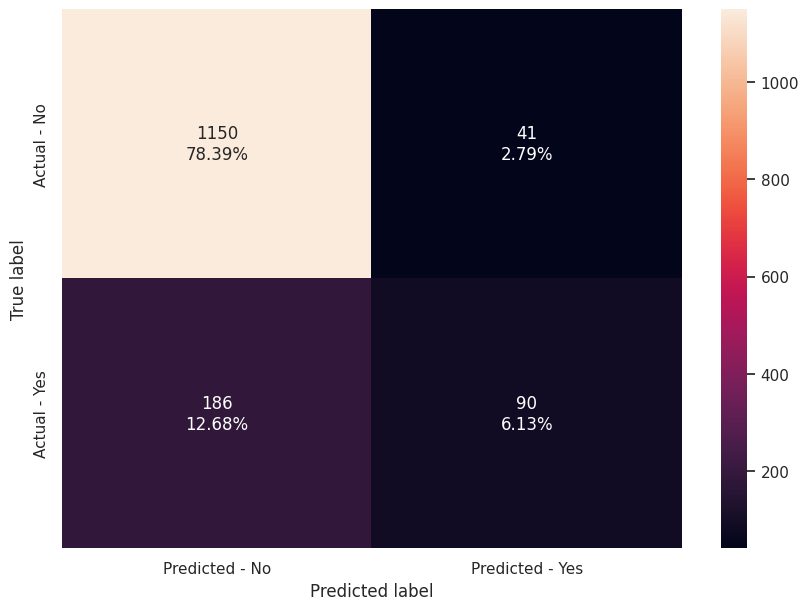

In [94]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

Observation:
1. The recall score is very low with Adaboosting. 
2. The accuracy score is the highest score in this model. 


### Hyperparameter Tuning

In [95]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.3000000000000003, n_estimators=100,
                   random_state=1)

Accuracy on training set :  0.9929845074539608
Accuracy on test set :  0.8888888888888888
Recall on training set :  0.9704968944099379
Recall on test set :  0.644927536231884
Precision on training set :  0.9920634920634921
Precision on test set :  0.7325102880658436
F1-Score on training set :  0.9811616954474098
F1-Score on test set :  0.6859344894026975


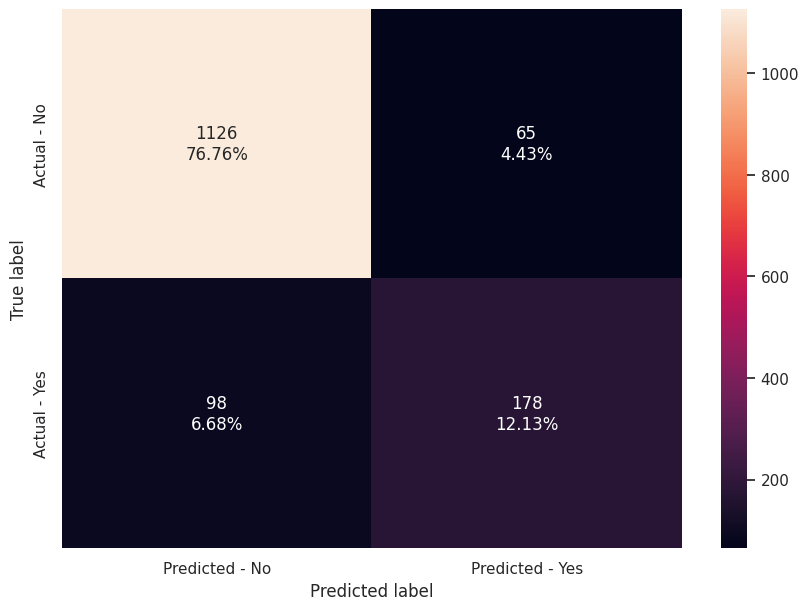

In [96]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

Observation:
1. The recall score improve. 
2. The model is overfit on the training set.  

## Gradient Boosting Classifier

Accuracy on training set :  0.8842443729903537
Accuracy on test set :  0.8657123381049762
Recall on training set :  0.4409937888198758
Recall on test set :  0.37681159420289856
Precision on training set :  0.8875
Precision on test set :  0.8062015503875969
F1-Score on training set :  0.5892116182572614
F1-Score on test set :  0.5135802469135802


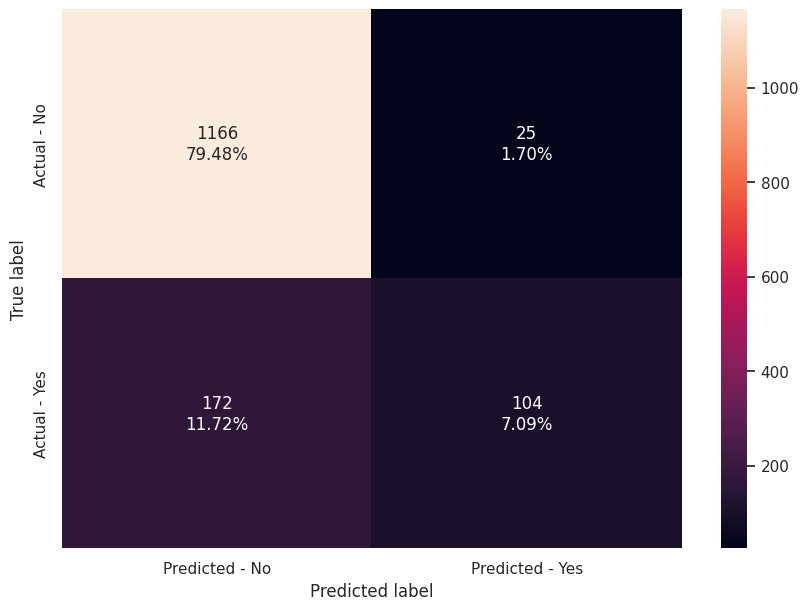

In [97]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

Observation:
1. The recall is very low on both the training and test set. 
2. The test set measures are low for all the measurements except for accuracy.  

### Hyperparameter Tuning

In [98]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

Accuracy on training set :  0.9207833966676411
Accuracy on test set :  0.8841172460804363
Recall on training set :  0.6149068322981367
Recall on test set :  0.5036231884057971
Precision on training set :  0.9451073985680191
Precision on test set :  0.8081395348837209
F1-Score on training set :  0.7450611476952023
F1-Score on test set :  0.6205357142857143


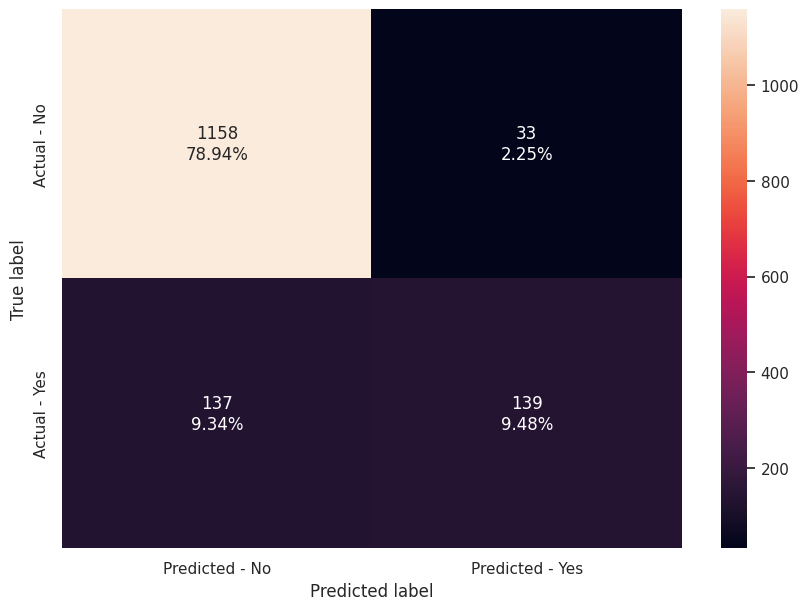

In [99]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

Observation:
1. The recall measure for the training and test set have about a 10% difference. 
2. The test set recall is not very high. 
3. All other measures seem to be higher than the recall score. 

## XGBoost Classifier

Accuracy on training set :  0.881613563285589
Accuracy on test set :  0.8623040218132243
Recall on training set :  0.43478260869565216
Recall on test set :  0.35507246376811596
Precision on training set :  0.8722741433021807
Precision on test set :  0.8032786885245902
F1-Score on training set :  0.5803108808290155
F1-Score on test set :  0.4924623115577889


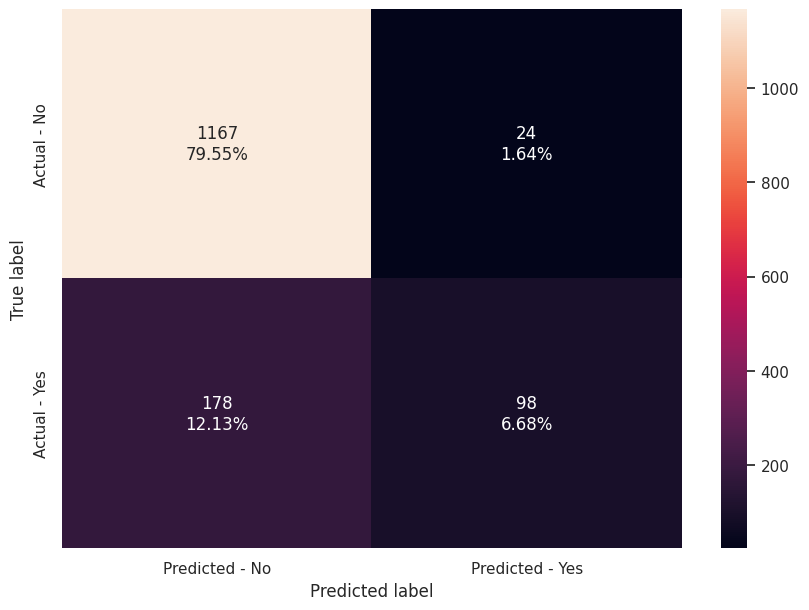

In [100]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

Observation:
1. The recall score is too low. 
2. The accuracy score is good, however accuracy does not give information about false negatives.  

### Hyperparameter Tuning

In [101]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.7, colsample_bytree=0.7,
              eval_metric='logloss', learning_rate=0.2, n_estimators=30,
              random_state=1, scale_pos_weight=5, subsample=0.9)

Accuracy on training set :  0.7983045893013738
Accuracy on test set :  0.7757327880027266
Recall on training set :  0.8043478260869565
Recall on test set :  0.782608695652174
Precision on training set :  0.4787430683918669
Precision on test set :  0.44536082474226807
F1-Score on training set :  0.6002317497103129
F1-Score on test set :  0.5676741130091985


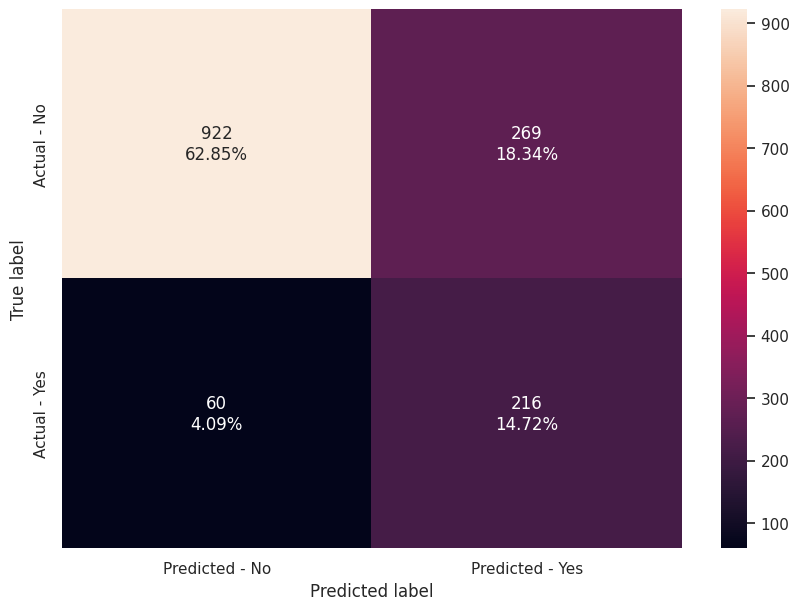

In [102]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

Observation:
1. The model drastically improved. 
2. The recall score is 80% on the training set, and 78% on the test set. 
3. The precision score is low, however it does not matter much in this model.


## Stacking Classifier

In [103]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=5,
                                                       max_features='log2',
                                                       min_samples_leaf=6,
                                                       n_estimators=30,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=250,
                                                    

Accuracy on training set :  0.8301666179479684
Accuracy on test set :  0.7832310838445807
Recall on training set :  0.9347826086956522
Recall on test set :  0.855072463768116
Precision on training set :  0.5276073619631901
Precision on test set :  0.4591439688715953
F1-Score on training set :  0.6745098039215686
F1-Score on test set :  0.5974683544303798


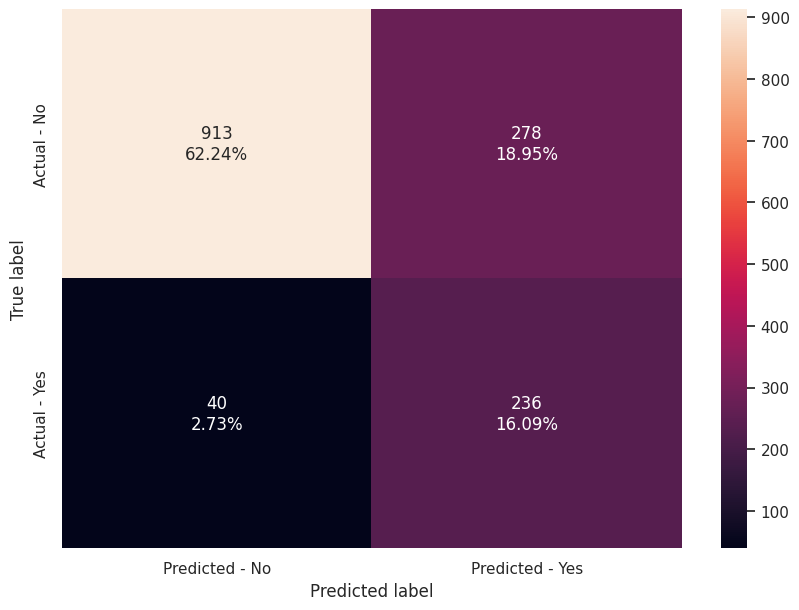

In [104]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

Observation:
1. The recall score is even better than XGBoost on both the training and test sets. 


## Comparing all models

In [105]:
# defining list of models
models = [d_tree, dtree_estimator,rf_estimator, rf_tuned, bagging_classifier,bagging_estimator_tuned,
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [106]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
5,Bagging Classifier Tuned,0.999415,0.921609,0.996894,0.652174,1.000000,0.904523,0.998445,0.757895
4,Bagging Classifier,0.992985,0.918882,0.968944,0.644928,0.993631,0.894472,0.981132,0.749474
2,Random Forest,1.000000,0.920927,1.000000,0.612319,1.000000,0.949438,1.000000,0.744493
0,Decision Tree,1.000000,0.886162,1.000000,0.702899,1.000000,0.695341,1.000000,0.699099
7,Tuned AdaBoost Classifier,0.992985,0.888889,0.970497,0.644928,0.992063,0.732510,0.981162,0.685934
9,Tuned Gradient Boosting Classifier,0.920783,0.884117,0.614907,0.503623,0.945107,0.808140,0.745061,0.620536
12,Stacking Classifier,0.830167,0.783231,0.934783,0.855072,0.527607,0.459144,0.674510,0.597468
11,Tuned XGBoost Classifier,0.798305,0.775733,0.804348,0.782609,0.478743,0.445361,0.600232,0.567674
3,Tuned Random Forest,0.768781,0.758691,0.771739,0.764493,0.435583,0.422000,0.556863,0.543814
1,Tuned Decision Tree,0.779889,0.789366,0.649068,0.659420,0.442328,0.458438,0.526117,0.540862


Observation:
1. The best stacking classifier offers the best model. 
2. Tuned XGBoost shows the 2nd best model based on recall scores. 


### Feature importance of Tuned Random Forest

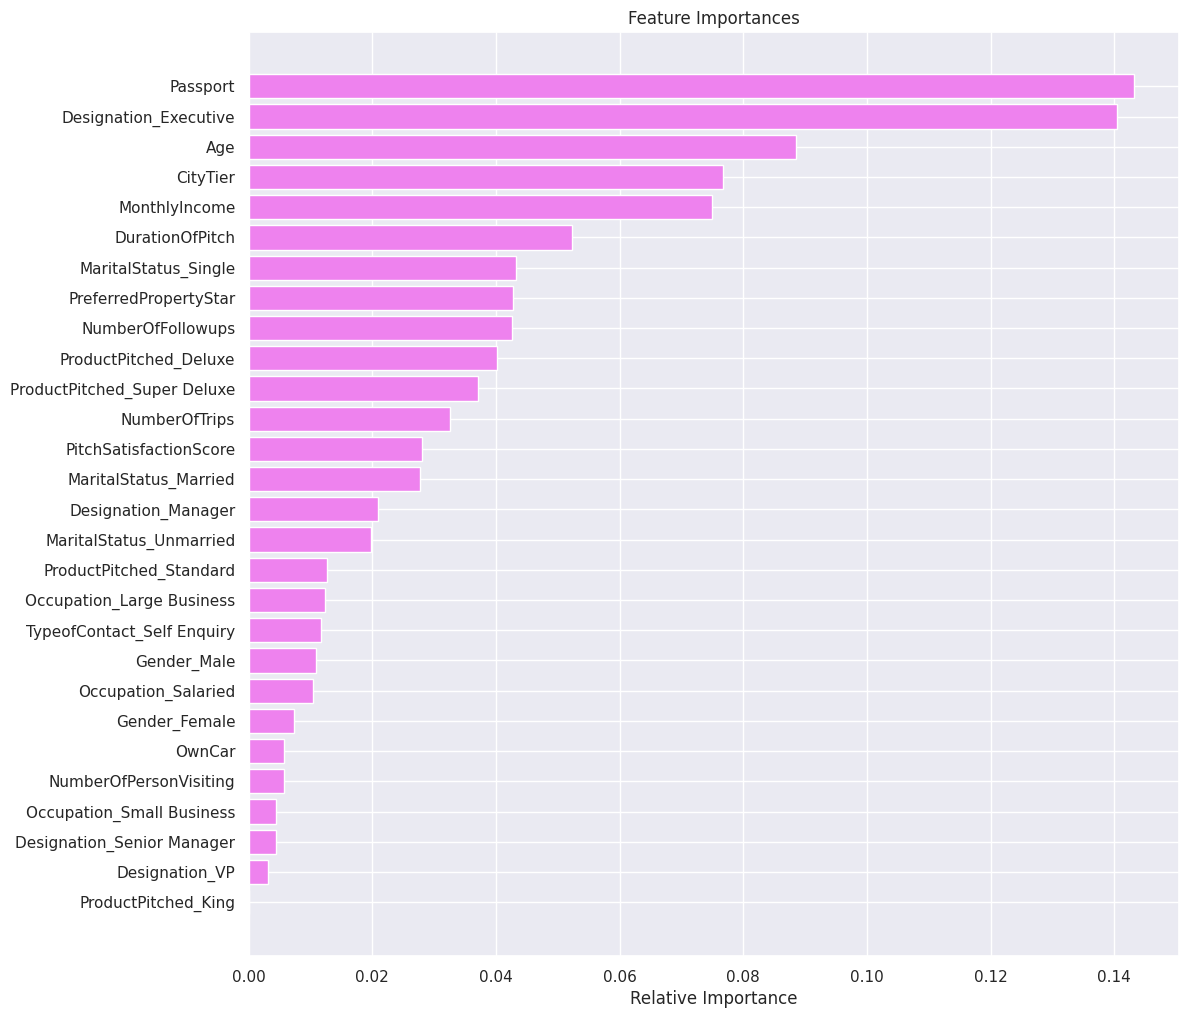

In [107]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observation:

The top two most important features are passport and designation. 

# Conclusion:

1. The company's target should be executives and single individuals looking to travel in groups of 2 or 3. 
2. They should also target individuals who have their passport. 
3. Seeing as this company has a large amount of individuals that reach out to them with inquiries they should invest resources into upselling packages. 
4. The company may be more successful as getting people to purchase packages if they initiated contact first more often. 
  
 


### Citations:
1. Dr.DeBary Oct 24 Lecture
2. Dr. DeBary Oct 31 Lecture
